<a href="https://colab.research.google.com/github/CodeHunterOfficial/AI_DataMining/blob/main/%D0%9F%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D1%85_%D1%80%D1%8F%D0%B4%D0%BE%D0%B2_12_10_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Прогнозирование временных рядов продаж недвижимости по республике Татарстан с использованием моделей SARIMAX и VAR

# 1. Применение моделей SARIMAX и VAR для прогнозирования продаж недвижимости в Республике Татарстан

В данной главе рассматривается использование моделей SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors) и VAR (Vector Autoregression) для прогнозирования временных рядов, связанных с продажами недвижимости в Республике Татарстан. Как упоминалось ранее, модели временных рядов позволяют учитывать как временные закономерности, так и взаимосвязи между различными экономическими и социальными показателями. Прежде чем приступить к моделированию, необходимо провести тщательную предобработку данных и проверку гипотез, чтобы обеспечить корректность и точность прогнозов.

### Описание набора данных

Для анализа используется набор данных [1], который охватывает информацию по всем регионам Российской Федерации и включает 5,477,006 записей, из которых 226,522 относятся к Республике Татарстан. Для упрощения анализа будут использованы только данные по Республике Татарстан. Данный набор данных содержит 13 признаков, из которых 11 являются числовыми, а 2 — категориальными. Подробное описание признаков приведено ниже.

**Категориальные признаки:**

1. **Region** — Код района Казани, идентифицирующий географическую область, где расположена квартира.
2. **Building Type** — Тип фасада здания, в котором находится квартира.
3. **Object Type** — Тип квартиры (например, новостройка или вторичное жилье).

**Числовые признаки:**

1. **Date** — Дата публикации объявления.
2. **Time** — Время публикации объявления.
3. **Latitude** — Географическая широта.
4. **Longitude** — Географическая долгота.
5. **Floor** — Этаж, на котором расположена квартира.
6. **Rooms** — Количество жилых комнат.
7. **Area** — Общая площадь квартиры в квадратных метрах.
8. **Kitchen Area** — Площадь кухни в квадратных метрах.
9. **Levels** — Общее количество этажей в здании.
10. **Price** — Стоимость квартиры в рублях РФ.

### Этапы подготовки данных для моделирования


### Описание этапов подготовки данных для моделирования


#### 1. Первичное ознакомление с данными

Этот этап включает в себя ознакомление с содержимым набора данных, его структурой и основными характеристиками, чтобы понять, с каким типом данных мы имеем дело и как лучше всего их использовать в моделировании.

- **Открытие файла с данными**:
  - Использование средств загрузки данных, таких как pandas (`pd.read_csv()` для данных в формате CSV), чтобы загрузить и просмотреть данные. На этом этапе важно проверить, что данные загружены корректно, и типы данных соответствуют ожидаемым (например, даты загружены как `datetime`, числовые значения как `float` или `int`).
  - Визуальная проверка первых нескольких строк данных (`df.head()`) для выявления потенциальных проблем, таких как неверное форматирование, неверные разделители или строки-заголовки, которые могли быть загружены в качестве данных.

- **Проверка структуры данных и типов данных**:
  - Проверка структуры данных на предмет соответствия типам столбцов их содержимому (например, столбцы, содержащие даты, должны иметь тип `datetime`, а числовые значения — тип `int` или `float`).
  - Анализ типов данных поможет определить, какие преобразования необходимо сделать перед началом анализа (например, преобразование строк, содержащих даты, в тип `datetime`).

#### 2. Анализ качества данных

Анализ качества данных является критически важным этапом подготовки данных для построения моделей прогнозирования. Цель этого этапа — выявить проблемы в данных и устранить их до начала моделирования, чтобы избежать получения ошибочных или ненадежных результатов.

- **Оценка полноты данных**:
  - Проверка на наличие пропусков (отсутствующих значений) в данных. Пропуски могут возникать из-за отсутствия информации при сборе данных или ошибок в записи данных. Для оценки полноты данных можно использовать функции pandas, такие как `isnull()` или `info()`, чтобы определить количество пропущенных значений в каждом столбце.
  - Решение по обработке пропусков: пропуски можно устранить несколькими способами, включая удаление строк или столбцов с большим количеством пропусков, замену пропусков на средние, медианные или модальные значения, либо использование методов интерполяции или алгоритмов машинного обучения для заполнения пропусков.

- **Анализ и устранение аномалий**:
  - Аномалии (или выбросы) — это значения, которые значительно отклоняются от других наблюдений в наборе данных и могут искажать результаты анализа.
  - Методы выявления аномалий включают визуальные инструменты, такие как диаграммы разброса (scatter plots), ящики с усами (box plots) и гистограммы, а также статистические методы, такие как метод Z-оценки (Z-score) или межквартильный размах (IQR).
  - После обнаружения аномалий необходимо принять решение о их обработке: они могут быть удалены, если являются ошибками, или трансформированы (например, методом логарифмирования) для уменьшения их влияния на анализ. Иногда аномалии имеют важное значение, и тогда их необходимо сохранить для дальнейшего анализа.



#### 3. Подготовка данных

Этот этап включает все необходимые преобразования для приведения данных к виду, удобному для моделирования. Правильная подготовка данных может значительно улучшить производительность модели и повысить точность прогнозов.

- **Преобразование и очистка данных**:
  - **Изменение типов данных**: Например, преобразование строковых представлений дат в объекты типа `datetime` с использованием `pd.to_datetime()`. Преобразование категориальных данных (таких как тип здания) в числовые с помощью кодирования (например, One-Hot Encoding или Label Encoding).
  - **Кодирование категориальных признаков**: Для того чтобы использовать категориальные данные в моделях машинного обучения, их нужно преобразовать в числовой формат. Например, можно использовать метод One-Hot Encoding для создания бинарных признаков или Label Encoding для преобразования категориальных значений в целочисленные.
  - **Нормализация и стандартизация данных**: Применение методов нормализации (приведение значений к диапазону от 0 до 1) или стандартизации (преобразование данных к стандартному нормальному распределению с использованием среднего и стандартного отклонения) для числовых данных. Это необходимо для того, чтобы предотвратить доминирование признаков с большими значениями над признаками с меньшими значениями в процессе обучения модели.

- **Инженерия признаков**:
  - **Создание новых признаков**: Это может включать вычисление дополнительных переменных, которые могут улучшить предсказательную способность модели. Например, создание признака "цена за квадратный метр", вычисленного как отношение стоимости квартиры к её площади, или "плотность застройки района" как отношение количества этажей к площади застройки.
  - **Преобразование существующих признаков**: Использование функций логарифмирования, извлечения корней, или создания взаимодействующих признаков (например, перемножение двух переменных) для улучшения линейных моделей.

- **Удаление дубликатов и ненужных столбцов**:
  - **Удаление дубликатов**: Использование метода `df.drop_duplicates()` для удаления дублирующихся записей, которые могут исказить результаты моделирования.
  - **Удаление ненужных столбцов**: Исключение данных, которые не несут полезной информации для анализа (например, столбцы с уникальными идентификаторами, которые не влияют на прогнозы).

#### 4. Исследовательский анализ данных (EDA)

Исследовательский анализ данных (EDA) помогает получить первые инсайты о наборе данных, выявить ключевые тенденции и аномалии, а также проверить различные гипотезы.

- **Анализ тенденций и аномалий**:
  - **Определение тенденций**: Исследование временных рядов для выявления трендов (например, увеличение или уменьшение цен на недвижимость с течением времени). Использование линейной регрессии или скользящих средних для моделирования трендов.
  - **Анализ аномалий**: Определение аномальных значений или событий, таких как резкие изменения цен, которые могут быть вызваны внешними факторами (например, экономическими или политическими событиями). Это можно сделать с помощью визуализации данных и анализа распределения значений признаков.

- **Визуализация данных**:
  - **Построение графиков и диаграмм**: Использование гистограмм, ящиков с усами, диаграмм рассеяния и тепловых карт корреляций для визуализации распределений признаков и выявления взаимосвязей между ними. Визуализация временных рядов с помощью графиков линий (line plots) помогает проанализировать сезонность, тренды и аномалии.
  - **Корреляционный анализ**: Построение тепловых карт корреляций для определения связей между различными признаками. Это поможет выявить признаки, которые имеют высокую корреляцию и могут быть полезны для моделей регрессии или других методов машинного обучения.

- **Анализ сезонных и временных факторов**:
  - **Определение сезонности и временных факторов**: Использование таких методов, как декомпозиция временных рядов (decomposition), для выявления сезонных колебаний и трендов, которые могут повлиять на прогнозы. Например, анализ сезонных изменений спроса на жилье в зависимости от времени года (зимой спрос может быть ниже, чем весной или осенью).

- **Проверка распределений данных**:
  - **Анализ распределений признаков**: Построение гистограмм, ящиков с усами и Q-Q графиков (квантиль-квантиль графики) для проверки нормальности распределения признаков, выявления выбросов и асимметрии. Это важно для определения необходимости трансформаций данных или применения методов, устойчивых к ненормальным распределениям.


#### 5. Проверка гипотез
   - **Статистический анализ**: На этом этапе проводится проверка предположений и гипотез о взаимосвязях между различными признаками с использованием статистических методов.
     - **Корреляционный анализ**: Исследование взаимосвязей между переменными для выявления сильных и слабых корреляций. Вычисление коэффициентов корреляции (например, Пирсона или Спирмена) помогает понять, как изменения одной переменной могут влиять на другую.
     - **Проверка гипотез о значимости переменных**: Использование статистических тестов (например, t-тест, ANOVA) для определения значимости различий между группами данных. Это позволяет проверить, являются ли различия в данных статистически значимыми, что важно для выбора переменных в модели.
     - **Анализ мультиколлинеарности**: Проверка на наличие сильной зависимости между несколькими независимыми переменными, что может повлиять на точность моделей. В случае обнаружения мультиколлинеарности принимаются меры по устранению избыточных переменных.

### Разработка и оценка моделей

#### 6. Разработка модели SARIMAX
   - **Определение параметров модели**:
     - Анализ автокорреляционной функции (ACF) и частичной автокорреляционной функции (PACF) временного ряда для выбора параметров модели SARIMAX (параметры сезонности и экзогенных регрессоров). Этот анализ помогает выявить порядок авторегрессии (p), порядок дифференцирования (d), порядок скользящего среднего (q), а также сезонные компоненты (P, D, Q, s).
   - **Обучение и тестирование модели**:
     - Разделение данных на обучающую и тестовую выборки. Обучающая выборка используется для подбора параметров модели, а тестовая — для проверки ее точности.
     - Обучение модели SARIMAX с использованием алгоритмов временных рядов и проверка результатов на тестовой выборке. Это позволяет оценить качество прогноза.
   - **Анализ остатков**:
     - Проверка свойств остатков модели (ошибок прогноза) для проверки соблюдения предположений о нормальности, стационарности, гетероскедастичности и автокорреляции. Например, если остатки не являются стационарными или автокоррелированными, это может означать, что модель недостаточно хорошо описывает данные.

#### 7. Разработка модели VAR
   - **Проверка стационарности временных рядов**:
     - Применение тестов на стационарность (например, тест Дики-Фуллера) для проверки, являются ли временные ряды стационарными. Если ряды не стационарны, то их дифференцируют до достижения стационарности.
   - **Определение порядка модели VAR**:
     - Использование критериев информационной сложности (AIC, BIC) для выбора оптимального порядка модели VAR (количество временных лагов). Этот выбор критически важен, так как неправильный порядок может привести к неверным прогнозам.
   - **Обучение модели и анализ остатков**:
     - Обучение модели VAR на основе стационарных временных рядов. После обучения проводится оценка точности прогноза, а также проверка свойств остатков модели (например, на нормальность, стационарность, автокорреляцию и гетероскедастичность), что позволяет выявить недостатки модели и при необходимости скорректировать ее параметры.


#### 8. Сравнение моделей и выбор наилучшей

На этом этапе проводится оценка и сравнение разработанных моделей SARIMAX и VAR с целью выбора наиболее подходящей модели для прогнозирования. Важно не только оценить точность моделей на обучающем наборе данных, но и проверить их устойчивость и способность обобщать результаты на новые данные.

- **Оценка точности моделей**:
  - Использование метрик прогнозирования, таких как RMSE (корень из средней квадратической ошибки), MAE (средняя абсолютная ошибка), и MAPE (средняя абсолютная процентная ошибка), для измерения точности прогнозов. Эти метрики помогают определить, какая из моделей обеспечивает более точные предсказания.
  - Проверка моделей на наличие автокорреляции в остатках с помощью теста Дарбина-Уотсона или автокорреляционной функции остатков (ACF). Модель с наименьшей автокорреляцией остатков считается предпочтительной, так как это указывает на более полное объяснение данных.

- **Методы валидации моделей**:
  - **Разделение на обучающую и тестовую выборки**: Классический метод, когда исходный набор данных делится на две части — обучающую (например, 70-80% данных) и тестовую (20-30%). Обучающая выборка используется для подбора параметров модели, а тестовая — для оценки ее точности на новых данных.
  - **Перекрестная проверка (Cross-Validation)**: Для временных рядов используется метод перекрестной проверки с временными срезами (time series cross-validation), чтобы оценить устойчивость модели. Данные разбиваются на последовательные временные срезы, и модель обучается и тестируется на различных подвыборках. Этот метод помогает определить, насколько хорошо модель справляется с прогнозированием на разных временных интервалах и устойчиво ли она к изменению структуры данных.
  - **K-Fold Cross-Validation с учетом временной структуры**: Разделение данных на K частей (фолдов) с сохранением временной последовательности, где модель обучается на первых K-1 частях, а тестируется на K-й части. Процесс повторяется K раз, каждый раз с новым фолдом для тестирования. Это помогает лучше понять, как модель будет работать с различными временными срезами и выявить возможные проблемы с переобучением.

- **Проверка моделей на переобучение**:
  - Использование методов перекрестной проверки (cross-validation) с временными срезами (time series cross-validation) для оценки устойчивости моделей на различных подвыборках данных. Модель, показывающая стабильные результаты на разных подвыборках, обладает преимуществом, поскольку является менее склонной к переобучению и более надежной для применения в различных условиях.

- **Интерпретация и анализ устойчивости моделей**:
  - **Оценка интерпретируемости моделей**: Анализ того, насколько понятны и объяснимы параметры моделей для конечных пользователей (аналитиков, руководителей). Модели, параметры которых легко интерпретировать (например, коэффициенты, указывающие на важность различных факторов), имеют большее практическое значение.
  - **Проверка устойчивости моделей к изменениям данных**: Моделирование на различных подмножествах данных для проверки чувствительности моделей к изменениям входных параметров. Модели, которые значительно меняют свои прогнозы при малых изменениях входных данных, считаются менее надежными.
  - **Анализ влияния включения или исключения отдельных переменных**: Определение, какие переменные оказывают наибольшее влияние на результаты прогнозов, и оценка того, насколько чувствительны модели к изменению этих переменных. Например, исключение переменной с низкой значимостью должно минимально повлиять на прогноз.



#### 9. Построение сценарных прогнозов

- **Сценарное моделирование**:
  - **Разработка различных сценариев**:
    - Построение различных сценариев (например, оптимистичного, пессимистичного, базового) для учета потенциальных будущих изменений в экономических и рыночных условиях. Эти сценарии основаны на разных предположениях, таких как рост или спад цен на жилье, изменение процентных ставок, экономическая рецессия и т. д.
  - **Оценка влияния каждого сценария на прогнозы**:
    - Анализ воздействия каждого сценария на прогнозные значения и построение соответствующих сценарных кривых. Этот процесс позволяет оценить, как различные условия могут повлиять на рынок недвижимости и как реагировать на изменения.
  
- **Оценка чувствительности моделей к изменениям входных данных**:
  - **Проведение анализа чувствительности моделей**:
    - Определение, как изменения ключевых входных параметров, таких как макроэкономические показатели (процентные ставки, уровень инфляции, темпы роста ВВП), влияют на прогнозы. Это позволяет выявить наибольшие риски и определить степень устойчивости моделей к изменениям.
  - **Оценка риска и неопределенности прогнозов**:
    - Анализ стабильности результатов моделей при вариациях входных данных. Модель с меньшей чувствительностью к таким изменениям считается более надежной и пригодной для долгосрочных прогнозов.

#### 10. Оценка экономического эффекта

- **Анализ экономической выгоды и затрат на внедрение моделей**:
  - **Оценка потенциальной экономической выгоды**:
    - Анализ преимуществ использования моделей, включая улучшение прогнозов продаж, оптимизацию ценовых стратегий, увеличение прибыли и снижение рисков. Определение показателей, которые улучшаются за счет более точных прогнозов (например, уменьшение простоя недвижимости или улучшение стратегии инвестирования).
  - **Расчет затрат на разработку, внедрение и обслуживание**:
    - Подсчет затрат на разработку, внедрение и поддержку моделей, включая расходы на программное обеспечение, оборудование, обучение сотрудников и привлечение внешних специалистов.
  - **Сравнение ожидаемой выгоды и затрат**:
    - Оценка рентабельности внедрения моделей на основе сравнения затрат и ожидаемой выгоды. Включение показателей, таких как возврат на инвестиции (ROI) и период окупаемости, чтобы определить экономическую целесообразность использования моделей.




### 1. Первичное ознакомление с данными

В этом разделе мы подробно рассмотрим, как открыть файл с данными, проверить его содержимое и определить, соответствуют ли типы данных ожиданиям. Давайте начнем с загрузки данных из файла `tatarstan_data.csv`.



#### Установка и импорт необходимых библиотек
На первом этапе установим все необходимые библиотеки:


In [157]:
# Установка необходимых библиотек
!pip install descartes matplotlib pandas statsmodels pmdarima


После установки всех необходимых библиотек, импортируем их, чтобы не делать это каждый раз.


In [158]:
# Для обработки данных
import pandas as pd  # Основной инструмент для работы с данными в табличном формате
import numpy as np  # Библиотека для работы с массивами и математическими операциями

# Визуализация данных
import matplotlib.pyplot as plt  # Основной инструмент для создания графиков
import seaborn as sns  # Инструмент для более удобной визуализации данных, построенный на основе matplotlib
sns.set_style("darkgrid")  # Устанавливаем стиль визуализации
import plotly.express as px  # Интерактивная визуализация данных
from folium.plugins import HeatMap  # Плагин для отображения тепловых карт

# Статистический анализ и модели
from scipy import stats
from statsmodels.formula.api import ols
import statsmodels.api as sm  # Основной инструмент для статистического анализа и построения моделей
import statsmodels.formula.api as smf  # Форматирование статистических моделей
from statsmodels.stats.diagnostic import het_breuschpagan  # Тест на гетероскедастичность
from statsmodels.stats.multicomp import pairwise_tukeyhsd  # Тест Тьюки для множественных сравнений
from statsmodels.tsa.statespace.sarimax import SARIMAX  # Модель SARIMAX для временных рядов
from statsmodels.tsa.stattools import adfuller  # Тест Дики-Фуллера для проверки стационарности
from statsmodels.tsa.vector_ar.var_model import VAR  # Модель VAR для многомерных временных рядов
from pmdarima import auto_arima

# Моделирование и оценка качества
from sklearn.decomposition import PCA  # Метод главных компонент для уменьшения размерности
from sklearn.cluster import KMeans  # Алгоритм кластеризации K-средних
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # Метрики для оценки моделей

# Математические функции
import math  # Математические функции, такие как вычисление квадратных корней


import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import VAR
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from scipy.stats import jarque_bera


#### Открытие файла с данными




1. **Загрузка данных с помощью Pandas**

Для работы с данными используем библиотеку Pandas. Она предоставляет удобные средства для загрузки данных из различных источников и их первичного анализа.

Поскольку наш датасет находится на Google Диске, сначала нам необходимо подключиться к диску с помощью следующей команды:


In [159]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


После подключения к Google Диску мы можем загрузить данные с помощью команды pd.read_csv.

In [160]:
df = pd.read_csv(u'/content/drive/MyDrive/all_v2/tatarstan_dataset.csv')
df.head()

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,4550000,2018-03-12,12:37:08,55.738846,49.225437,2922,3,6,10,2,54.2,11.4,1
1,2880000,2018-03-15,14:38:45,55.734971,52.366385,2922,1,8,10,2,51.0,8.0,1
2,4000000,2018-06-07,14:11:48,55.777062,49.216766,2922,2,11,14,2,66.0,10.6,11
3,3500000,2018-06-12,12:09:54,55.651105,51.799888,2922,1,5,9,3,84.0,14.0,1
4,3100000,2018-07-11,16:47:23,55.736290,49.100226,2922,1,8,10,1,39.6,8.8,1



В этом коде:
- `pd.read_csv(u'/content/drive/MyDrive/all_v2/tatarstan_dataset.csv')` загружает данные из CSV файла в DataFrame `df`.
- `df.head()` выводит первые 5 строк таблицы, что позволяет нам визуально проверить, что данные загружены корректно и посмотреть пример их структуры.

2. **Проверка структуры данных и типов данных**

   Далее, нужно проверить, что типы данных в DataFrame соответствуют ожидаемым. Это поможет понять, какие преобразования данных могут понадобиться.


In [161]:
 # Просмотр общей информации о данных
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226522 entries, 0 to 226521
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   price          226522 non-null  int64  
 1   date           226522 non-null  object 
 2   time           226522 non-null  object 
 3   geo_lat        226522 non-null  float64
 4   geo_lon        226522 non-null  float64
 5   region         226522 non-null  int64  
 6   building_type  226522 non-null  int64  
 7   level          226522 non-null  int64  
 8   levels         226522 non-null  int64  
 9   rooms          226522 non-null  int64  
 10  area           226522 non-null  float64
 11  kitchen_area   226522 non-null  float64
 12  object_type    226522 non-null  int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 22.5+ MB
None


В этом коде:
   - `df.info()` выдает информацию о DataFrame, включая типы данных каждого столбца и количество ненулевых значений. Это позволяет удостовериться, что данные загружены правильно и соответствуют ожиданиям (например, строки с датами должны быть преобразованы в тип `datetime`, числовые значения должны быть в формате `int` или `float`).







В результате анализа данных был получен DataFrame, содержащий 226522 записи и 13 переменных. Структура данных представлена следующим образом:

- **price**: целочисленная переменная (int64), обозначающая цену объекта, содержит 226522 ненулевых значений.
- **date**: строковая переменная (object), указывающая дату, также содержит 226522 ненулевых значений.
- **time**: строковая переменная (object), указывающая время, содержит 226522 ненулевых значений.
- **geo_lat**: числовая переменная с плавающей точкой (float64), представляющая географическую широту, содержит 226522 ненулевых значений.
- **geo_lon**: числовая переменная с плавающей точкой (float64), представляющая географическую долготу, содержит 226522 ненулевых значений.
- **region**: целочисленная переменная (int64), обозначающая регион, содержит 226522 ненулевых значений.
- **building_type**: целочисленная переменная (int64), указывающая тип здания, содержит 226522 ненулевых значений.
- **level**: целочисленная переменная (int64), обозначающая этаж, содержит 226522 ненулевых значений.
- **levels**: целочисленная переменная (int64), указывающая общее количество этажей в здании, содержит 226522 ненулевых значений.
- **rooms**: целочисленная переменная (int64), обозначающая количество комнат, содержит 226522 ненулевых значений.
- **area**: числовая переменная с плавающей точкой (float64), представляющая общую площадь объекта, содержит 226522 ненулевых значений.
- **kitchen_area**: числовая переменная с плавающей точкой (float64), представляющая площадь кухни, содержит 226522 ненулевых значений.
- **object_type**: целочисленная переменная (int64), указывающая тип объекта, содержит 226522 ненулевых значений.

Общий объем памяти, занимаемый DataFrame, составляет более 22.5 МБ. Данные полностью заполнены и не содержат пропусков, что позволяет проводить дальнейший анализ без необходимости предварительной обработки.





### 2. Анализ качества данных

Анализ качества данных помогает выявить и устранить проблемы, которые могут исказить результаты анализа и моделирования. В этом разделе мы рассмотрим, как проверять наличие пропусков и аномалий в данных.

#### Оценка полноты данных

1. **Проверка на наличие пропусков**

   Пропуски в данных могут возникать по разным причинам и могут существенно повлиять на результаты анализа.


In [162]:
# Проверка наличия пропусков в данных
missing_values = df.isnull().sum()
print(missing_values)

price            0
date             0
time             0
geo_lat          0
geo_lon          0
region           0
building_type    0
level            0
levels           0
rooms            0
area             0
kitchen_area     0
object_type      0
dtype: int64


 В этом коде:
   - `df.isnull().sum()` подсчитывает количество пропущенных значений в каждом столбце. Это помогает определить, в каких столбцах есть пропуски и сколько их.
   
В результате проверки наличия пропусков в данных было установлено, что все переменные в DataFrame не содержат пропусков. Конкретные результаты проверки представлены ниже:

- **price**: 0 пропусков
- **date**: 0 пропусков
- **time**: 0 пропусков
- **geo_lat**: 0 пропусков
- **geo_lon**: 0 пропусков
- **region**: 0 пропусков
- **building_type**: 0 пропусков
- **level**: 0 пропусков
- **levels**: 0 пропусков
- **rooms**: 0 пропусков
- **area**: 0 пропусков
- **kitchen_area**: 0 пропусков
- **object_type**: 0 пропусков

Таким образом, данные являются полными и готовы к дальнейшему анализу.

2. **Обработка пропусков**

   В зависимости от ситуации, пропуски можно обработать несколькими способами:

   - **Удаление строк с пропусками:**

In [163]:
# Удаление строк с пропущенными значениями
df_cleaned = df.dropna()
df_cleaned

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,4550000,2018-03-12,12:37:08,55.738846,49.225437,2922,3,6,10,2,54.2,11.4,1
1,2880000,2018-03-15,14:38:45,55.734971,52.366385,2922,1,8,10,2,51.0,8.0,1
2,4000000,2018-06-07,14:11:48,55.777062,49.216766,2922,2,11,14,2,66.0,10.6,11
3,3500000,2018-06-12,12:09:54,55.651105,51.799888,2922,1,5,9,3,84.0,14.0,1
4,3100000,2018-07-11,16:47:23,55.736290,49.100226,2922,1,8,10,1,39.6,8.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
226517,9150000,2021-05-01,19:28:40,55.762340,49.233610,2922,2,18,25,3,96.0,16.0,1
226518,3490000,2021-05-01,19:36:40,55.870114,49.084974,2922,1,6,9,1,35.0,7.0,1
226519,1130000,2021-05-01,19:42:38,55.883206,52.304918,2922,3,5,5,1,32.0,7.0,1
226520,4190000,2021-05-01,20:06:40,55.769120,49.240475,2922,1,1,10,1,38.0,8.5,1



   - **Замена пропусков на средние, медианные или модальные значения:**

     ```python
     # Замена пропусков на медианное значение для числовых столбцов
     df.fillna(df.median(), inplace=True)
     ```

   - **Использование методов интерполяции:**

     ```python
     # Интерполяция пропусков
     df.interpolate(inplace=True)
     ```

   В этом коде:
   - `df.dropna()` удаляет все строки с пропущенными значениями.
   - `df.fillna(df.median())` заменяет пропуски медианным значением в числовых столбцах.
   - `df.interpolate()` применяет интерполяцию для заполнения пропусков.



#### Анализ и устранение аномалий

1. **Выявление аномалий**

   Аномалии (или выбросы) — это значения, которые значительно отклоняются от остальной части данных. Мы можем использовать визуальные и статистические методы для их выявления.

   - **Диаграмма разброса (Scatter Plot):**


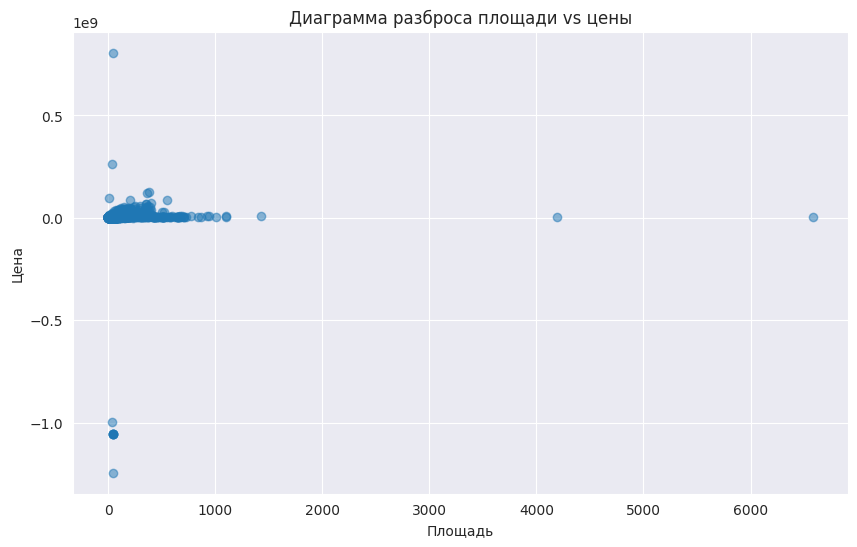

In [164]:
plt.figure(figsize=(10, 6))
plt.scatter(df['area'], df['price'], alpha=0.5)
plt.title('Диаграмма разброса площади vs цены')
plt.xlabel('Площадь')
plt.ylabel('Цена')
plt.show()

- **Ящик с усами (Box Plot):**


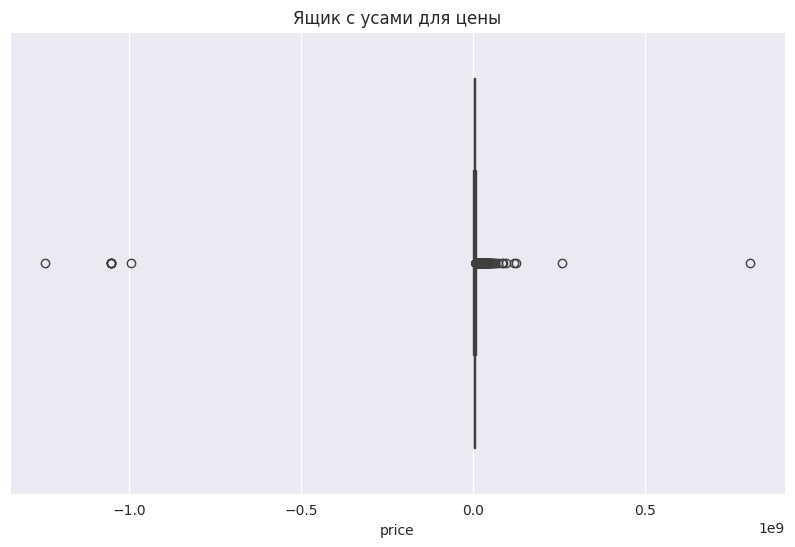

In [165]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Ящик с усами для цены')
plt.show()


   - **Статистические методы (Z-оценка и IQR):**


   

In [166]:
# Вычисление Z-оценки
df['z_score'] = stats.zscore(df['price'])
outliers_z = df[df['z_score'].abs() > 3]
print(outliers_z)

# Вычисление межквартильного размаха (IQR)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = df[(df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR))]
print(outliers_iqr)

           price        date      time    geo_lat    geo_lon  region  \
1684    36340000  2018-09-13  19:14:46  55.791003  49.135170    2922   
2906    48000000  2018-09-18  04:39:19  55.817428  49.120240    2922   
4026    25300000  2018-09-21  16:01:21  55.794476  49.126278    2922   
5646    29800000  2018-09-27  14:45:46  55.777887  49.143099    2922   
5944    31900000  2018-09-28  15:01:22  55.789715  49.131040    2922   
...          ...         ...       ...        ...        ...     ...   
224087  25000000  2021-04-22  07:52:49  55.817181  49.121373    2922   
224881  87000000  2021-04-25  11:02:33  55.793656  49.115795    2922   
224928  29500000  2021-04-25  13:57:24  55.817428  49.120240    2922   
225050  25000000  2021-04-26  05:18:55  55.817181  49.121373    2922   
225147  24999000  2021-04-26  12:07:39  55.796493  49.128711    2922   

        building_type  level  levels  rooms   area  kitchen_area  object_type  \
1684                2      3       5      3  204.2    

Здесь:
   - Диаграмма разброса и ящик с усами позволяют визуально выявить выбросы.
   - Z-оценка и IQR помогают количественно определить выбросы.

2. **Обработка аномалий**

   После выявления аномалий нужно решить, как их обрабатывать. Возможные подходы включают:



  - **Удаление аномалий:**




In [167]:
df_cleaned = df[~df.index.isin(outliers_z.index)]
df_cleaned = df[~df.index.isin(outliers_iqr.index)]

 - **Замена аномалий:**


In [168]:
# Замена аномалий на медианное значение
median_price = df['price'].median()
df['price'] = df['price'].apply(lambda x: median_price if x > (Q3 + 1.5 * IQR) else x)


   - **Трансформация данных:**




In [169]:
import numpy as np

# Логарифмирование цен
df['log_price'] = np.log1p(df['price'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


   В этом коде:
   - `df[~df.index.isin(outliers_z.index)]` и `df[~df.index.isin(outliers_iqr.index)]` удаляют строки с аномальными значениями.
   - `df['price'].apply(lambda x: median_price if x > (Q3 + 1.5 * IQR) else x)` заменяет выбросы медианным значением.
   - `np.log1p(df['price'])` выполняет логарифмирование значений для уменьшения влияния выбросов.


### 3. Подготовка данных

Этап подготовки данных критичен для достижения качественных результатов при моделировании. Этот процесс включает преобразование данных, очистку, кодирование категориальных признаков, нормализацию и стандартизацию данных, а также инженерные преобразования и удаление ненужных элементов.

#### Преобразование и очистка данных

**1. Изменение типов данных**

Прежде всего, убедимся, что все данные имеют корректные типы. В нашем случае необходимо преобразовать строковые представления дат и времени в тип `datetime`, а также выполнить кодирование категориальных данных.



- **Преобразование строковых представлений дат и времени:**

  Мы уже преобразовали `date` и `time` в столбец `datetime`, но если бы мы не сделали этого, вот как это можно было бы реализовать:


In [170]:
 # Преобразование столбцов 'date' и 'time' в тип datetime
df['date'] = pd.to_datetime(df['date'])
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.time
df['datetime'] = pd.to_datetime(df['date'].astype(str) + ' ' + df['time'].astype(str))

  # Удаление исходных столбцов 'date' и 'time'
df.drop(['date', 'time'], axis=1, inplace=True)


Это преобразует столбцы в формат `datetime`, что удобно для анализа временных данных.

После этого следует очистка данных от ненужных символов и преобразование в числовой формат:

In [171]:
# Очистка данных от ненужных символов и преобразование в числовой формат
df["price"] = df["price"].replace('[\₽,]', '', regex=True).astype(float).round(2)
df["area"] = df["area"].replace('[\м²,]', '', regex=True).astype(float).round(2)
df["kitchen_area"] = df["kitchen_area"].replace('[\м²,]', '', regex=True).astype(float).round(2)

df["geo_lat"] = df["geo_lat"].astype(float)
df["geo_lon"] = df["geo_lon"].astype(float)
df["level"] = df["level"].astype(int)
df["levels"] = df["levels"].astype(int)
df["rooms"] = df["rooms"].astype(int)
df["region"] = df["region"].astype(str)

df['building_type'] = df['building_type'].astype('category')
df['object_type'] = df['object_type'].astype('category')

Таким образом, все столбцы будут приведены к соответствующим типам данных, что обеспечит корректность дальнейшего анализа и обработки данных.



- **Кодирование категориальных признаков:**

  Мы имеем несколько категориальных признаков, таких как `building_type`, `region`, и `object_type`. Эти признаки нужно преобразовать в числовые форматы. В Pandas можно использовать Label Encoding или One-Hot Encoding.

  - **Label Encoding** (для переменных с порядком):


In [172]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['building_type'] = le.fit_transform(df['building_type'])
df['region'] = le.fit_transform(df['region'])
df['object_type'] = le.fit_transform(df['object_type'])

Этот метод преобразует категории в уникальные числовые значения.

  - **One-Hot Encoding** (для переменных без порядка):


In [173]:
#df = pd.get_dummies(df, columns=['building_type', 'region', 'object_type'], drop_first=True)

В случае необходимости вы можете преобразовать переменные в категориальный тип:

Метод One-Hot Encoding создает бинарные столбцы для каждой категории, что позволяет модели лучше понимать категориальные данные.

**2. Нормализация и стандартизация данных**

Для улучшения работы модели, особенно для алгоритмов, чувствительных к масштабу данных, таких как регрессия или SVM, важно применить нормализацию или стандартизацию.

- **Нормализация данных:**

  Нормализация приводит данные к диапазону от 0 до 1. Это можно сделать с помощью Min-Max Scaling.


In [174]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['price', 'area', 'kitchen_area']] = scaler.fit_transform(df[['price', 'area', 'kitchen_area']])

  Здесь `MinMaxScaler` масштабирует данные в диапазон от 0 до 1, что делает данные совместимыми по шкале.

- **Стандартизация данных:**

  Стандартизация приводит данные к стандартному нормальному распределению (с нулевым средним и единичным стандартным отклонением).


In [175]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['price', 'area', 'kitchen_area']] = scaler.fit_transform(df[['price', 'area', 'kitchen_area']])


  Здесь `StandardScaler` преобразует данные так, чтобы они имели нулевое среднее и единичное стандартное отклонение.

### Инженерия признаков

Инженерия признаков — это процесс создания новых признаков из существующих данных для улучшения производительности модели. Ниже приведены примеры создания различных признаков, которые могут быть полезны в вашем анализе.

#### 1. Создание новых признаков

- **Цена за квадратный метр:**

  Этот признак позволяет анализировать стоимость недвижимости относительно её площади.


In [176]:
df['price_per_sqm'] = df['price'] / df['area']


- **Плотность застройки района:**

  Если у вас есть информация о количестве этажей и площади района, можно создать признак плотности:



In [177]:
df['density'] = df['levels'] / df['area']


- **Определение времени года:**

  Извлечение информации о времени года из даты:




In [178]:
df['season'] = df['datetime'].dt.month % 12 // 3 + 1
df['season'] = df['season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})


- **Количество дней с начала периода:**

  Это поможет анализировать временные тренды:





In [179]:
df['days_since_start'] = (df['datetime'] - df['datetime'].min()).dt.days

- **Сезонные компоненты:**

  Извлечение года и месяца:



In [180]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month


- **Создание переменной времени дня:**

  Извлечение часов из даты:


In [181]:
df['hour_of_day'] = df['datetime'].dt.hour


- **Интервалы времени дня:**

  Разделение дня на интервалы:


In [182]:
def time_of_day_interval(hour):
     if 0 <= hour < 6:
         return 'Night'
     elif 6 <= hour < 12:
         return 'Morning'
     elif 12 <= hour < 18:
         return 'Afternoon'
     else:
         return 'Evening'

df['time_of_day_interval'] = df['hour_of_day'].apply(time_of_day_interval)


- **Год постройки:**

  Извлечение года постройки из даты:



In [183]:
df['year_built'] = df['datetime'].dt.year


#### Проверка типов данных после преобразования

После всех преобразований полезно проверить типы данных в датафрейме:


In [184]:
print("\nПроверка типов данных после преобразования:")
print(df.dtypes)


Проверка типов данных после преобразования:
price                          float64
geo_lat                        float64
geo_lon                        float64
region                           int64
building_type                    int64
level                            int64
levels                           int64
rooms                            int64
area                           float64
kitchen_area                   float64
object_type                      int64
z_score                        float64
log_price                      float64
datetime                datetime64[ns]
price_per_sqm                  float64
density                        float64
season                          object
days_since_start                 int64
year                             int32
month                            int32
hour_of_day                      int32
time_of_day_interval            object
year_built                       int32
dtype: object




Эти новые признаки могут значительно повысить качество модели, предоставляя больше информации для анализа. Если нужны дополнительные примеры или пояснения, дайте знать!

Переменные, такие как building_type, object_type, season и time_of_day_interval, могут быть преобразованы в категориальный тип для повышения производительности и уменьшения использования памяти:

In [185]:
df['building_type'] = df['building_type'].astype('category')
df['object_type'] = df['object_type'].astype('category')
df['season'] = df['season'].astype('category')
df['time_of_day_interval'] = df['time_of_day_interval'].astype('category')



**2. Преобразование существующих признаков**

Применение различных математических преобразований к данным может помочь улучшить качество модели.

- **Логарифмирование данных:**

  Логарифмирование помогает справиться с распределениями данных, которые сильно смещены.




In [186]:
df['log_price'] = np.log1p(df['price'])
df['log_area'] = np.log1p(df['area'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


 `np.log1p()` применяется для логарифмирования, что позволяет сохранить отрицательные значения при преобразовании.

- **Создание взаимодействующих признаков:**

  Примером может быть произведение двух признаков.


In [187]:
df['area_kitchen_ratio'] = df['area'] / df['kitchen_area']



#### Удаление дубликатов и ненужных столбцов

**1. Удаление дубликатов**


Дубликаты могут искажать результаты анализа и моделирования, поэтому важно их удалить или обработать.

Прежде всего, проверим, существуют ли в нашем датасете дубликаты. Если они есть, их необходимо удалить. Для этого можно использовать функции, которые позволяют находить и удалять повторяющиеся записи. Например, в Python с использованием библиотеки pandas это можно сделать следующим образом:



In [188]:
# Проверка на наличие дубликатов
duplicates = df.duplicated().sum()
print(f'Количество дубликатов: {duplicates}')

# Удаление дубликатов
df.drop_duplicates(inplace=True)
#df_cleaned=df.drop_duplicates()
print('Дубликаты удалены.')

Количество дубликатов: 42
Дубликаты удалены.


После удаления дубликатов важно провести несколько проверок, чтобы убедиться, что данные теперь корректны для дальнейшего анализа. Вот некоторые шаги, которые можно предпринять:

1. **Проверка количества записей**: Сравните количество записей до и после удаления дубликатов. Это поможет понять, насколько сильно данные были очищены.

   ```python
   print(f'Количество записей до удаления дубликатов: {len(df)}')
   print(f'Количество записей после удаления дубликатов: {len(df_cleaned)}')
   ```

2. **Анализ уникальных значений**: Проверьте уникальные значения в ключевых столбцах, чтобы убедиться, что они соответствуют ожиданиям.

   ```python
   print(df_cleaned['ваш_столбец'].unique())
   ```

3. **Проверка на пропущенные значения**: Убедитесь, что удаление дубликатов не привело к появлению новых пропусков в данных.

   ```python
   print(df_cleaned.isnull().sum())
   ```

4. **Сравнение статистики**: Проверьте основные статистические показатели (среднее, медиана, стандартное отклонение) до и после удаления дубликатов, чтобы увидеть, как они изменились.

   ```python
   print(df.describe())
   print(df_cleaned.describe())
   ```

5. **Визуализация данных**: Используйте графики для визуализации данных до и после удаления дубликатов, чтобы увидеть, как изменилось распределение.

6. **Дополнительная обработка**: Если вы обнаружите, что дубликаты содержат полезную информацию (например, разные записи для одного и того же объекта), возможно, вам потребуется объединить их или обработать иначе, вместо простого удаления.

Эти шаги помогут убедиться, что данные теперь готовы к дальнейшему анализу и не содержат скрытых проблем.


**2. Удаление ненужных столбцов**

Удаление столбцов, которые не предоставляют полезной информации для модели, помогает упростить данные и ускорить процесс обучения. На первом этапе мы удалим столбец региона, так как будем рассматривать только регион Татарстана, и он не содержит важной информации. Также временно удалим признаки log_price и log_area, так как они сейчас не нужны; их добавили для демонстрации.




In [189]:
# Удаление ненужных столбцов (например, уникальных идентификаторов)
df.drop(['region'], axis=1, inplace=True)  # Удаляем столбец региона

# Удаляем временные столбцы, которые не нужны на текущем этапе
df.drop(['log_price'], axis=1, inplace=True)  # Удаляем логарифмическую цену
df.drop(['log_area'], axis=1, inplace=True)  # Удаляем логарифмическую площадь



Таким образом, подготовка данных является важным этапом в процессе создания модели машинного обучения. Этот этап включает в себя преобразование данных, их очистку, кодирование категориальных признаков, нормализацию и стандартизацию числовых данных, создание и преобразование признаков, а также удаление дубликатов и ненужных столбцов. Хорошо подготовленные данные обеспечивают более точные и надежные результаты моделей и анализа.

### 4. Исследовательский анализ данных (EDA)

Исследовательский анализ данных (EDA) представляет собой ключевой этап в процессе подготовки данных, направленный на получение глубокого понимания набора данных. Этот этап позволяет выявить основные тенденции, аномалии, взаимосвязи между признаками, а также проверить распределения данных. Подробно рассмотрим каждую часть процесса EDA.

#### Анализ тенденций и аномалий

**1. Определение тенденций**

Для анализа тенденций в данных, особенно временных рядов, мы можем использовать различные методы визуализации и статистические подходы.

- **Исследование временных рядов:**

  Мы будем анализировать, как изменяется цена недвижимости с течением времени. Построим график, чтобы увидеть тренды.


<ipython-input-190-6ab63fd37c27>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_prices = df['price'].resample('M').mean()
<ipython-input-190-6ab63fd37c27>:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  monthly_prices = monthly_prices.fillna(method='ffill')  # Заполнение вперед


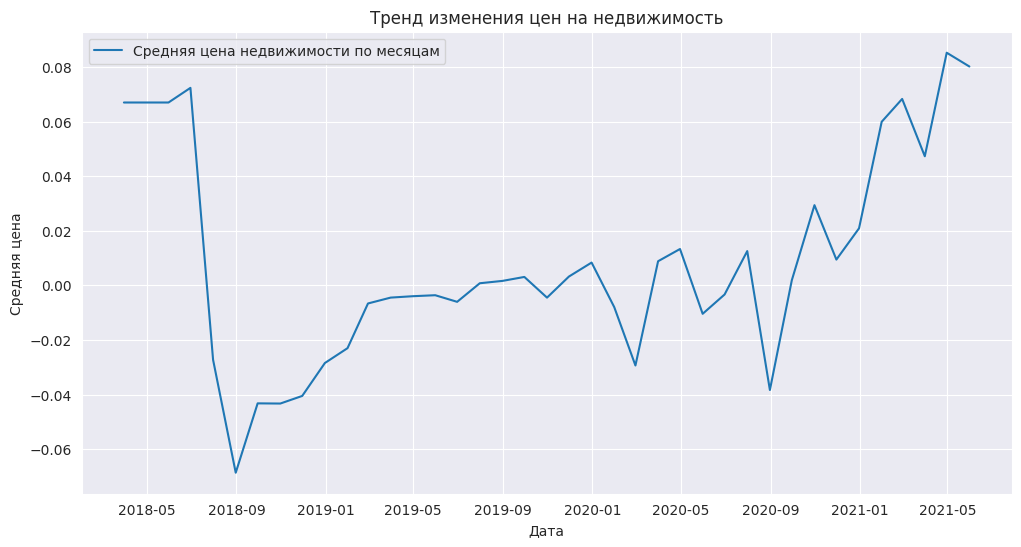

In [190]:
import pandas as pd
import matplotlib.pyplot as plt

# Преобразуем 'datetime' в индекс
df.set_index('datetime', inplace=True)

# Группируем данные по месяцам и вычисляем среднюю цену
monthly_prices = df['price'].resample('M').mean()

#Заполнение пропусков:
monthly_prices = monthly_prices.fillna(method='ffill')  # Заполнение вперед

# Построение графика временного ряда
plt.figure(figsize=(12, 6))
plt.plot(monthly_prices, label='Средняя цена недвижимости по месяцам')
plt.title('Тренд изменения цен на недвижимость')
plt.xlabel('Дата')
plt.ylabel('Средняя цена')
plt.legend()
plt.grid(True)
plt.show()


  Этот график позволит нам увидеть, есть ли явные тренды в изменении цен на недвижимость.

- **Моделирование трендов:**

  Для более точного анализа трендов можно использовать линейную регрессию или скользящие средние.



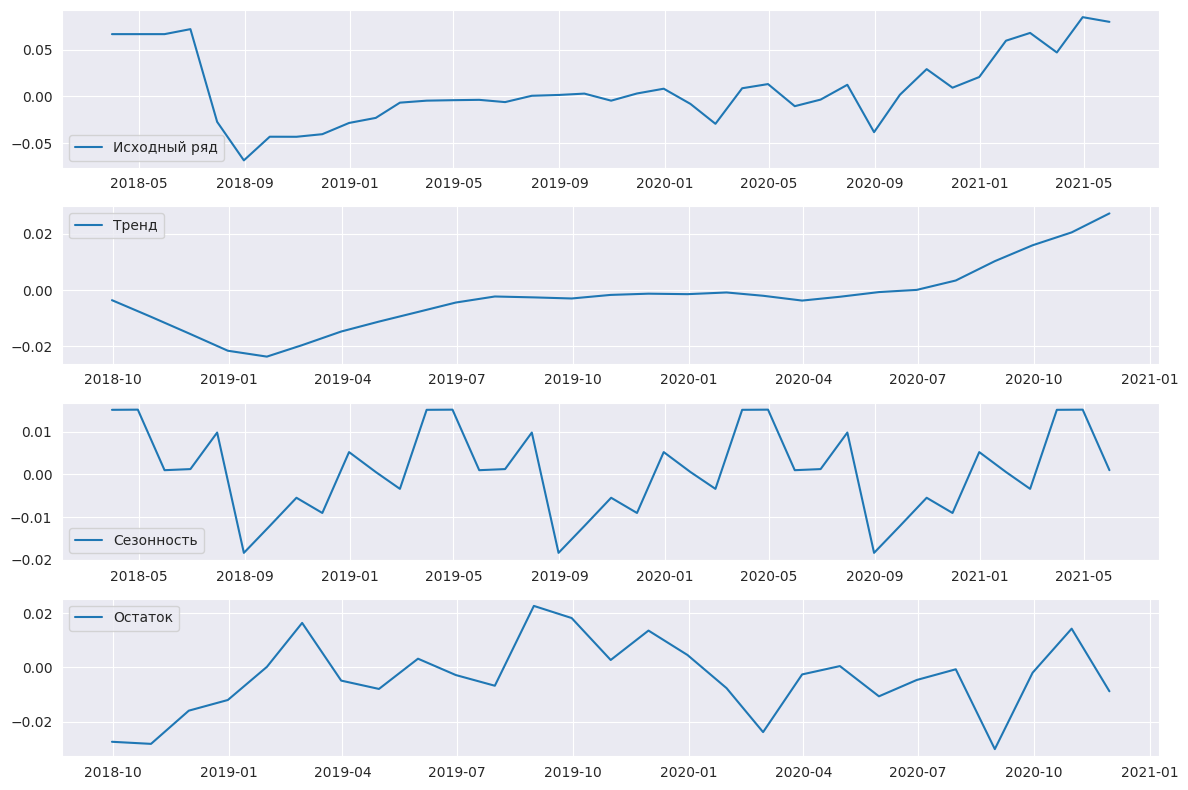

In [191]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Декомпозиция временного ряда
decomposition = seasonal_decompose(monthly_prices, model='additive')

# Построение графиков компонентов
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(monthly_prices, label='Исходный ряд')
plt.legend()
plt.subplot(412)
plt.plot(decomposition.trend, label='Тренд')
plt.legend()
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Сезонность')
plt.legend()
plt.subplot(414)
plt.plot(decomposition.resid, label='Остаток')
plt.legend()
plt.tight_layout()
plt.show()


  Этот подход позволяет выделить тренды, сезонные колебания и остатки.

**2. Анализ аномалий**

Аномалии в данных могут указывать на ошибочные записи или важные события.

- **Визуализация аномалий:**

  Построим диаграмму разброса (scatter plot) и ящик с усами (box plot) для выявления аномалий в ценах и других числовых признаках.


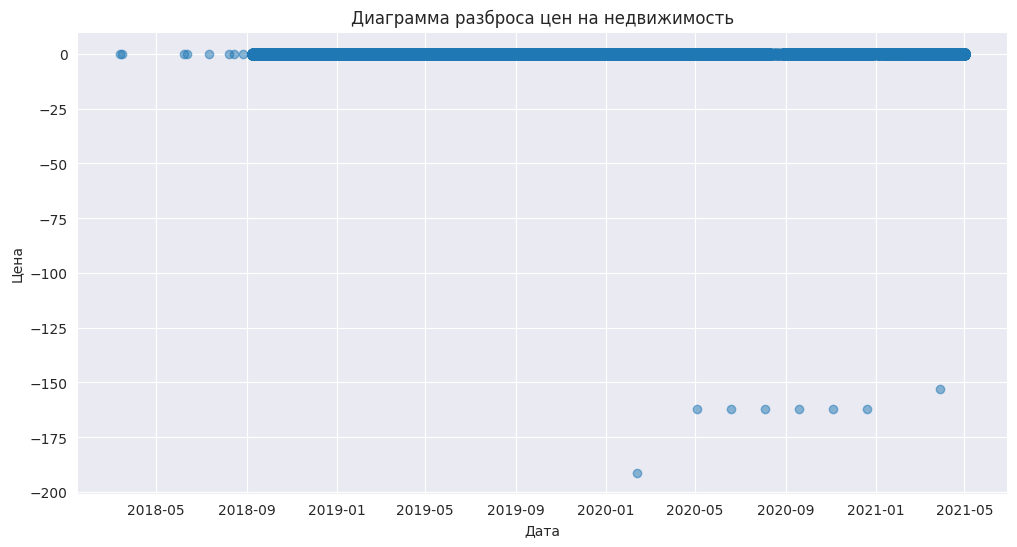

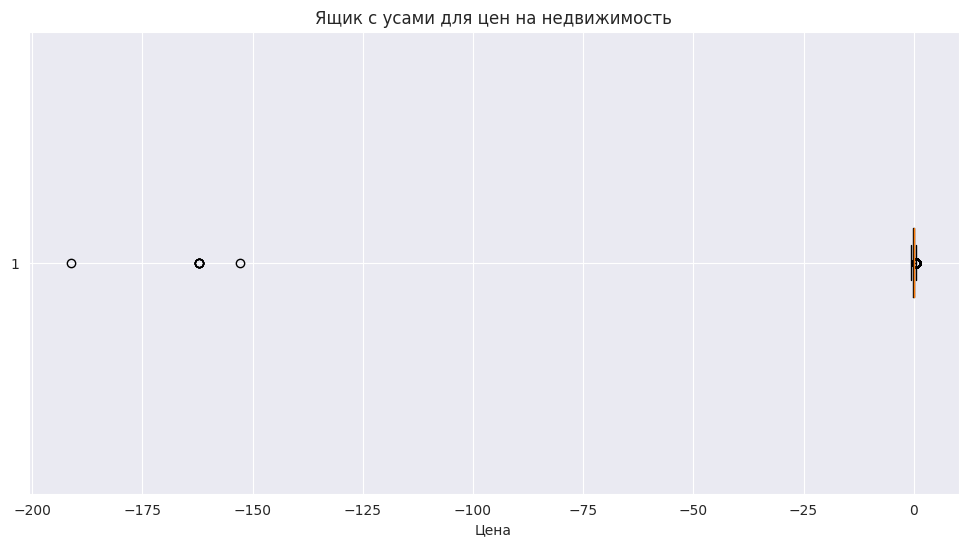

In [192]:
# Диаграмма разброса для выявления аномалий
plt.figure(figsize=(12, 6))
plt.scatter(df.index, df['price'], alpha=0.5)
plt.title('Диаграмма разброса цен на недвижимость')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.grid(True)
plt.show()

  # Ящик с усами для анализа распределения цен
plt.figure(figsize=(12, 6))
plt.boxplot(df['price'], vert=False)
plt.title('Ящик с усами для цен на недвижимость')
plt.xlabel('Цена')
plt.grid(True)
plt.show()


  Эти графики помогут обнаружить выбросы и аномальные значения в данных.

#### Визуализация данных

**1. Построение графиков и диаграмм**

- **Гистограммы:**

  Гистограммы полезны для проверки распределения данных.


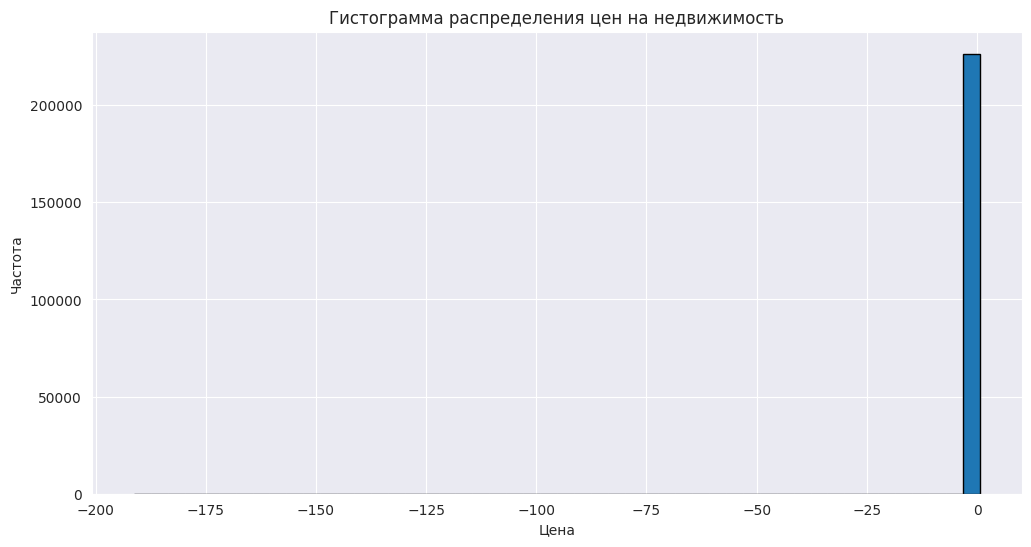

In [193]:
# Гистограмма для анализа распределения цен
plt.figure(figsize=(12, 6))
plt.hist(df['price'], bins=50, edgecolor='k')
plt.title('Гистограмма распределения цен на недвижимость')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.grid(True)
plt.show()


- **Ящики с усами (Box plots):**

  Ящики с усами показывают медиану, квартали и выбросы.


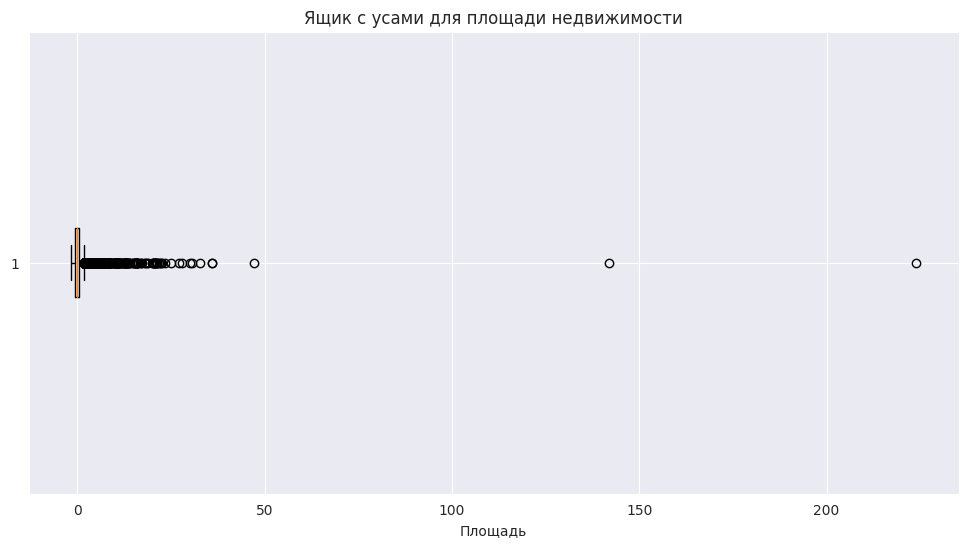

In [194]:
# Ящик с усами для площади недвижимости
plt.figure(figsize=(12, 6))
plt.boxplot(df['area'], vert=False)
plt.title('Ящик с усами для площади недвижимости')
plt.xlabel('Площадь')
plt.grid(True)
plt.show()


- **Диаграммы рассеяния (Scatter plots):**

  Диаграммы рассеяния показывают зависимость между двумя числовыми признаками.


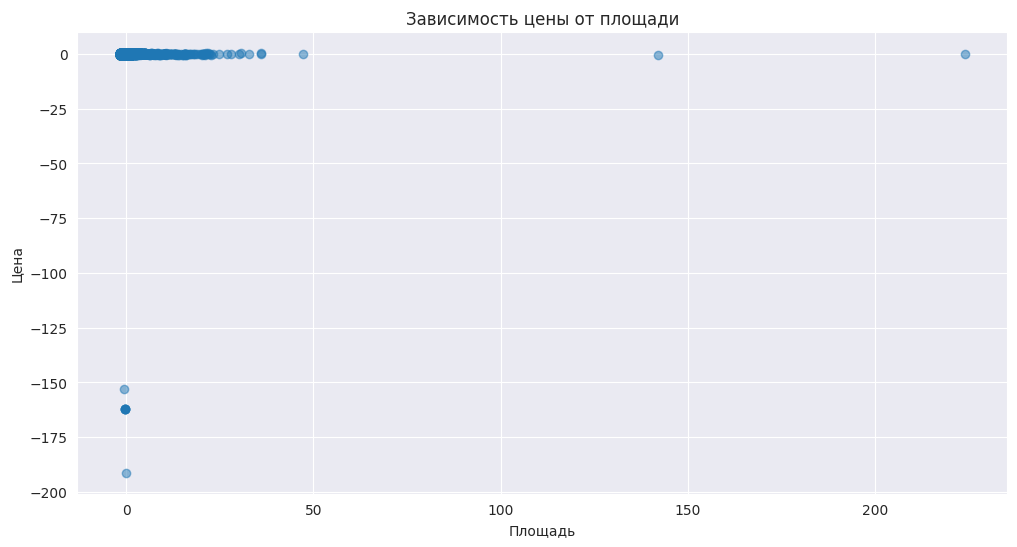

In [195]:
# Диаграмма рассеяния для площади и цены
plt.figure(figsize=(12, 6))
plt.scatter(df['area'], df['price'], alpha=0.5)
plt.title('Зависимость цены от площади')
plt.xlabel('Площадь')
plt.ylabel('Цена')
plt.grid(True)
plt.show()


#### Анализ сезонных и временных факторов

**1. Определение сезонности и временных факторов**

Анализ сезонности и трендов может помочь в понимании влияния времени на данные.

- **Декомпозиция временного ряда:**

  Декомпозиция временных рядов помогает выделить сезонные колебания и тренды.


<ipython-input-196-992faa30586b>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_mean_prices = df['price'].resample('M').mean()
<ipython-input-196-992faa30586b>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  monthly_mean_prices = monthly_mean_prices.fillna(method='ffill')  # Заполнение вперед


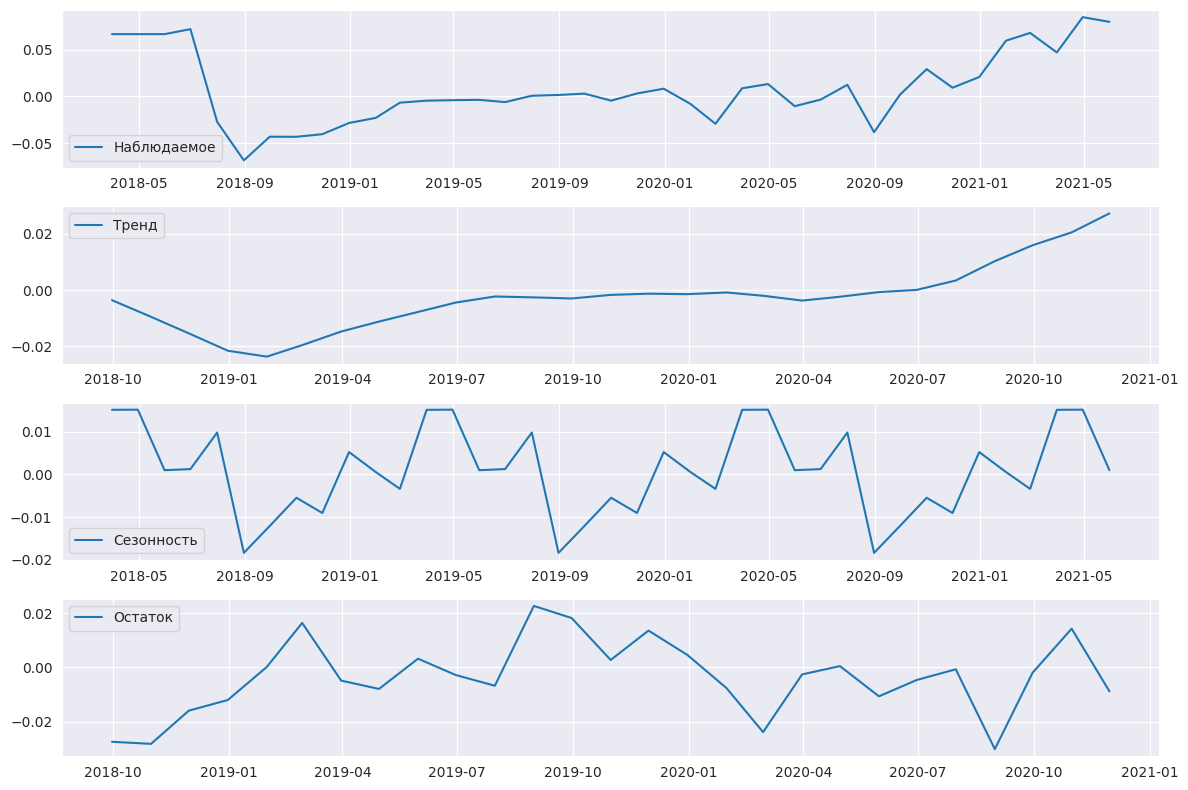

In [196]:
from statsmodels.tsa.seasonal import seasonal_decompose
monthly_mean_prices = df['price'].resample('M').mean()
monthly_mean_prices = monthly_mean_prices.fillna(method='ffill')  # Заполнение вперед
# Декомпозиция временного ряда
decomposition = seasonal_decompose(monthly_mean_prices, model='additive')

# Построение графиков компонентов
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(decomposition.observed, label='Наблюдаемое')
plt.legend()
plt.subplot(412)
plt.plot(decomposition.trend, label='Тренд')
plt.legend()
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Сезонность')
plt.legend()
plt.subplot(414)
plt.plot(decomposition.resid, label='Остаток')
plt.legend()
plt.tight_layout()
plt.show()


  Этот анализ позволяет выделить сезонные колебания и тренды в данных.

#### Проверка распределений данных

**1. Анализ распределений признаков**

Анализ распределений признаков помогает определить, соответствуют ли данные предполагаемым распределениям.

- **Гистограммы распределений:**


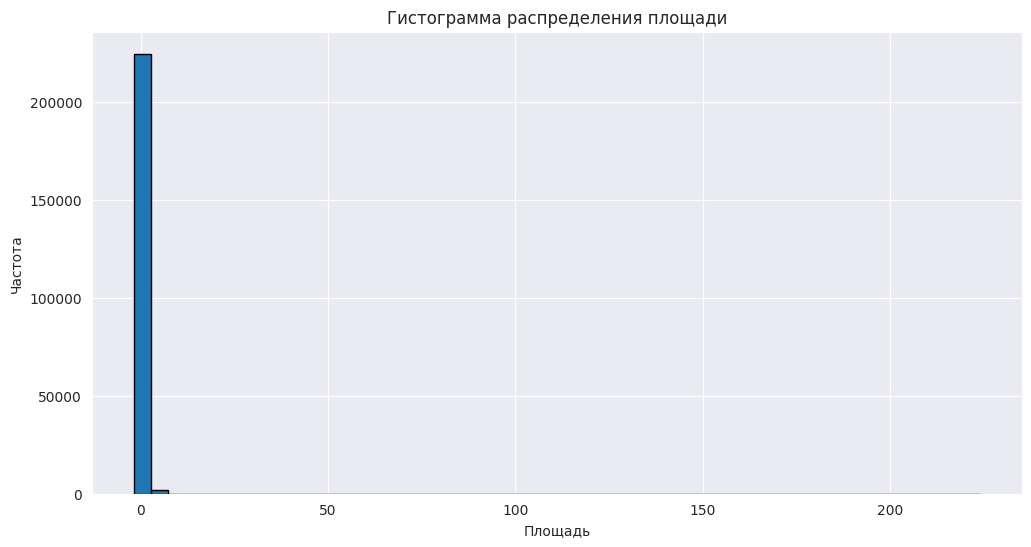

In [197]:
# Гистограмма для площади
plt.figure(figsize=(12, 6))
plt.hist(df['area'], bins=50, edgecolor='k')
plt.title('Гистограмма распределения площади')
plt.xlabel('Площадь')
plt.ylabel('Частота')
plt.grid(True)
plt.show()


- **Ящики с усами и Q-Q графики:**

  Ящики с усами и Q-Q графики помогают выявить выбросы и проверить нормальность распределений.

  

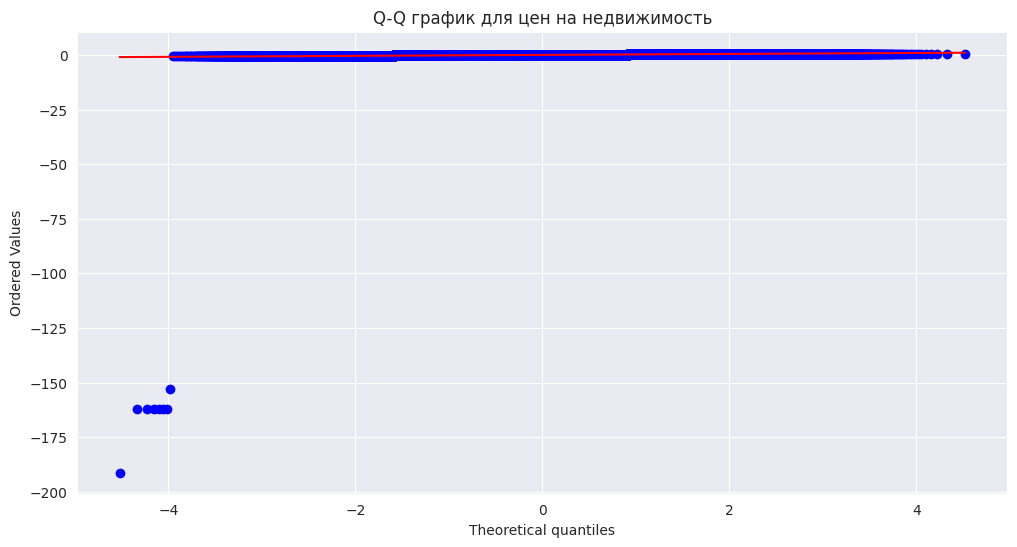

In [198]:
import scipy.stats as stats

# Q-Q график для цен
plt.figure(figsize=(12, 6))
stats.probplot(df['price'], dist="norm", plot=plt)
plt.title('Q-Q график для цен на недвижимость')
plt.show()

Этот график помогает проверить, насколько распределение цен приближается к нормальному.

Таким образом, исследовательский анализ данных (EDA) играет важную роль в понимании данных и подготовке их для построения модели. На этом этапе важно выявить ключевые тенденции, аномалии, взаимосвязи между признаками, а также проверить распределения данных. Визуализация данных через графики и диаграммы, декомпозиция временных рядов и корреляционный анализ помогают в получении глубоких инсайтов, которые могут значительно улучшить последующий процесс моделирования и анализа.

### 5. Проверка гипотез

На этапе проверки гипотез мы проводим статистический анализ данных, чтобы подтвердить или опровергнуть предположения о взаимосвязях между переменными. Этот этап критически важен для определения значимости признаков и оценки возможного влияния одной переменной на другую. Рассмотрим более подробно, как можно реализовать проверку гипотез в Python.

#### 1. Корреляционный анализ

Корреляционный анализ позволяет определить степень взаимосвязи между переменными.

**1.1. Вычисление коэффициентов корреляции**

Коэффициенты корреляции помогают понять, насколько сильно связаны две переменные. Наиболее распространенные коэффициенты корреляции — это коэффициент Пирсона и Спирмена.

- **Коэффициент корреляции Пирсона**: Используется для определения линейной зависимости между переменными. Подходит для количественных данных.

- **Коэффициент корреляции Спирмена**: Используется для проверки монотонных зависимостей. Подходит для данных с ранговыми шкалами или когда данные не распределены нормально.



In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 226480 entries, 2018-03-12 12:37:08 to 2021-05-01 20:11:37
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   price                 226480 non-null  float64 
 1   geo_lat               226480 non-null  float64 
 2   geo_lon               226480 non-null  float64 
 3   building_type         226480 non-null  category
 4   level                 226480 non-null  int64   
 5   levels                226480 non-null  int64   
 6   rooms                 226480 non-null  int64   
 7   area                  226480 non-null  float64 
 8   kitchen_area          226480 non-null  float64 
 9   object_type           226480 non-null  category
 10  z_score               226480 non-null  float64 
 11  price_per_sqm         226480 non-null  float64 
 12  density               226480 non-null  float64 
 13  season                226480 non-null  category
 14  da

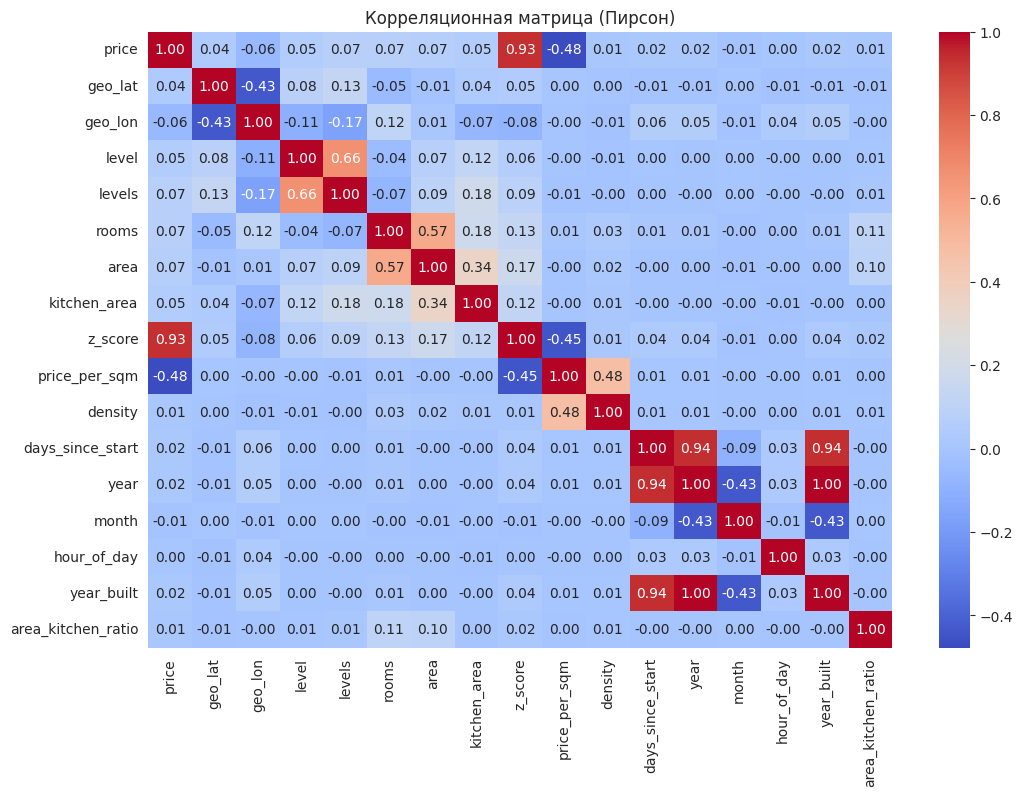

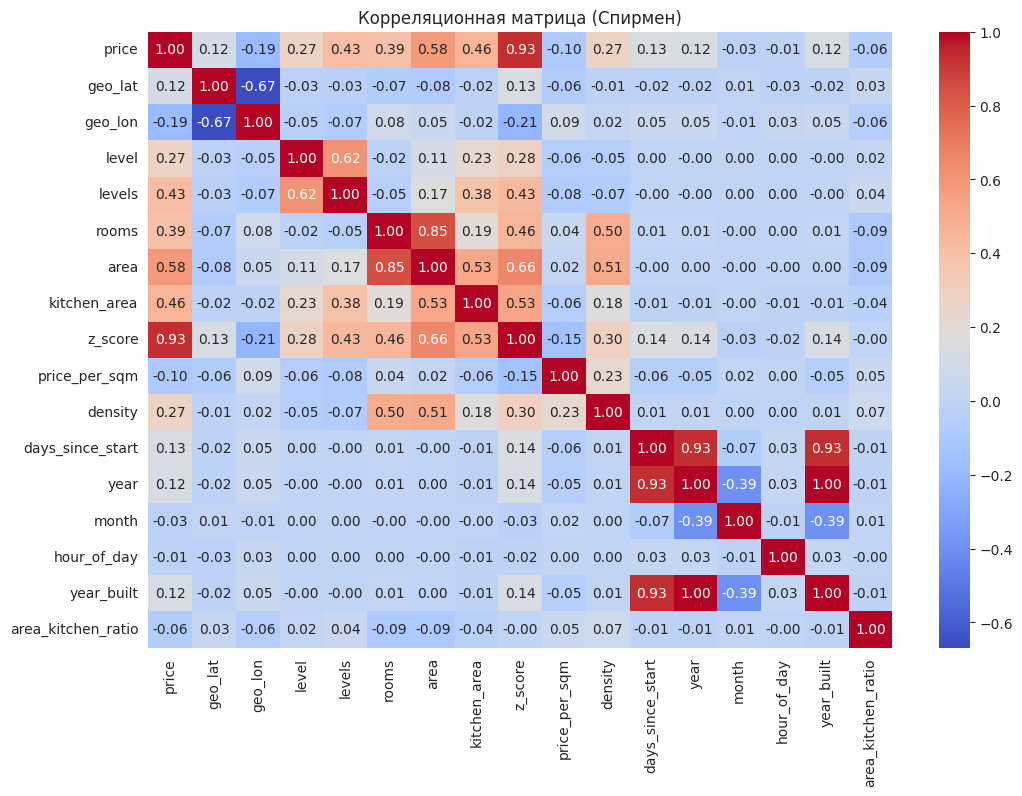

In [200]:
# Оставляем только числовые столбцы
numeric_df = df.select_dtypes(include=['float64', 'int64', 'int32'])

# Рассчитываем коэффициенты корреляции
pearson_corr = numeric_df.corr(method='pearson')
spearman_corr = numeric_df.corr(method='spearman')

# Визуализация
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица (Пирсон)')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица (Спирмен)')
plt.show()

In [201]:
pearson_corr

,price,geo_lat,geo_lon,level,levels,rooms,area,kitchen_area,z_score,price_per_sqm,density,days_since_start,year,month,hour_of_day,year_built,area_kitchen_ratio
price,1.000000,0.038117,-0.059211,0.048094,0.074120,0.072337,0.070128,0.052919,0.931599,-0.477477,0.008294,0.020501,0.020604,-0.006147,0.002608,0.020604,0.011646
geo_lat,0.038117,1.000000,-0.433019,0.083976,0.133245,-0.052673,-0.009166,0.038592,0.047047,0.002959,0.000019,-0.005414,-0.006709,0.004237,-0.011900,-0.006709,-0.009104
geo_lon,-0.059211,-0.433019,1.000000,-0.106211,-0.169872,0.116786,0.007461,-0.069287,-0.080634,-0.003311,-0.010144,0.058222,0.054905,-0.005289,0.039949,0.054905,-0.000858
level,0.048094,0.083976,-0.106211,1.000000,0.664731,-0.044668,0.072221,0.123873,0.062715,-0.003385,-0.005037,0.001737,0.000010,0.004553,-0.001297,0.000010,0.005996
levels,0.074120,0.133245,-0.169872,0.664731,1.000000,-0.074320,0.094092,0.183030,0.089845,-0.005415,-0.004704,0.000320,-0.000362,0.002294,-0.001176,-0.000362,0.007403
rooms,0.072337,-0.052673,0.116786,-0.044668,-0.074320,1.000000,0.568591,0.178511,0.129656,0.007638,0.033298,0.009562,0.010159,-0.004281,0.000407,0.010159,0.106796
area,0.070128,-0.009166,0.007461,0.072221,0.094092,0.568591,1.000000,0.343290,0.173412,-0.000002,0.022944,-0.001863,0.000377,-0.005941,-0.003614,0.000377,0.096581
kitchen_area,0.052919,0.038592,-0.069287,0.123873,0.183030,0.178511,0.343290,1.000000,0.121941,-0.001518,0.011022,-0.003344,-0.002872,-0.000376,-0.005464,-0.002872,0.000001
z_score,0.931599,0.047047,-0.080634,0.062715,0.089845,0.129656,0.173412,0.121941,1.000000,-0.447072,0.009040,0.035328,0.035125,-0.009283,0.001235,0.035125,0.021685
price_per_sqm,-0.477477,0.002959,-0.003311,-0.003385,-0.005415,0.007638,-0.000002,-0.001518,-0.447072,1.000000,0.475403,0.005485,0.005171,-0.000546,-0.003404,0.005171,0.000056


In [202]:
spearman_corr

,price,geo_lat,geo_lon,level,levels,rooms,area,kitchen_area,z_score,price_per_sqm,density,days_since_start,year,month,hour_of_day,year_built,area_kitchen_ratio
price,1.000000,0.118033,-0.187810,0.270557,0.425075,0.394797,0.581143,0.459747,0.932967,-0.096540,0.265766,0.127388,0.120897,-0.029200,-0.014866,0.120897,-0.062742
geo_lat,0.118033,1.000000,-0.668190,-0.026829,-0.033209,-0.065468,-0.076493,-0.016563,0.132159,-0.062729,-0.010228,-0.019155,-0.021014,0.005369,-0.027119,-0.021014,0.034898
geo_lon,-0.187810,-0.668190,1.000000,-0.047553,-0.069335,0.079872,0.052841,-0.015063,-0.213928,0.088933,0.018532,0.046117,0.047567,-0.006471,0.029217,0.047567,-0.061147
level,0.270557,-0.026829,-0.047553,1.000000,0.615192,-0.017684,0.113604,0.227646,0.281184,-0.061848,-0.050991,0.000445,-0.001395,0.003003,0.000885,-0.001395,0.018020
levels,0.425075,-0.033209,-0.069335,0.615192,1.000000,-0.047286,0.165423,0.384598,0.433655,-0.079003,-0.074494,-0.000156,-0.002728,0.002954,0.000687,-0.002728,0.044816
rooms,0.394797,-0.065468,0.079872,-0.017684,-0.047286,1.000000,0.849165,0.193350,0.457397,0.043622,0.498582,0.013450,0.013733,-0.004355,0.002857,0.013733,-0.088378
area,0.581143,-0.076493,0.052841,0.113604,0.165423,0.849165,1.000000,0.526760,0.660879,0.018031,0.514059,-0.001140,0.000273,-0.003596,-0.003375,0.000273,-0.092792
kitchen_area,0.459747,-0.016563,-0.015063,0.227646,0.384598,0.193350,0.526760,1.000000,0.533947,-0.056529,0.176426,-0.013187,-0.011450,-0.002364,-0.010952,-0.011450,-0.037440
z_score,0.932967,0.132159,-0.213928,0.281184,0.433655,0.457397,0.660879,0.533947,1.000000,-0.147987,0.296599,0.143014,0.135532,-0.031717,-0.016358,0.135532,-0.002328
price_per_sqm,-0.096540,-0.062729,0.088933,-0.061848,-0.079003,0.043622,0.018031,-0.056529,-0.147987,1.000000,0.227640,-0.055333,-0.052288,0.015542,0.004293,-0.052288,0.047640



В нашей корреляционной матрице (heatmap) представлены коэффициенты корреляции Пирсона между различными переменными, связанными с характеристиками недвижимости. Этот анализ позволяет выявить взаимосвязи между ценами объектов и другими факторами, что может быть полезно как для исследователей, так и для практиков в области недвижимости.

### Основные выводы

1. **Цена и Z-оценка**:
   Наиболее значимая корреляция наблюдается между ценой и Z-оценкой (r = 0.9316), что указывает на сильную положительную связь. Это свидетельствует о том, что Z-оценка, отражающая стандартизированное значение цены относительно среднего, является важным индикатором для оценки стоимости объектов.

2. **Площадь и количество комнат**:
   Коэффициенты корреляции между ценой и площадью (r = 0.0701) и количеством комнат (r = 0.0723) показывают слабую положительную связь. Это указывает на то, что хотя площадь и количество комнат имеют некоторую связь с ценой, они не являются решающими факторами.

3. **Цена за квадратный метр**:
   Интересно, что цена за квадратный метр имеет отрицательную корреляцию с ценой (r = -0.4775). Это может означать, что при увеличении общей цены объектов наблюдается снижение цены за квадратный метр, что связано с тем, что более дорогие объекты часто имеют большую площадь.

4. **Географические координаты**:
   Корреляции между ценой и географическими координатами (широта r = 0.0381, долгота r = -0.0592) также являются слабыми, что может указывать на то, что местоположение не является ключевым фактором в оценке цены недвижимости в данном наборе данных.

5. **Временные переменные**:
   Временные переменные, такие как количество дней с начала (r = 0.0205) и год (r = 0.0206), показывают очень слабую положительную корреляцию с ценой, что может указывать на отсутствие значительных временных трендов в рассматриваемом периоде.

Таким образом, анализ коэффициентов корреляции Пирсона предоставляет важную информацию о взаимосвязи между ценой недвижимости и различными характеристиками объектов. Наиболее значимые связи были обнаружены с Z-оценкой, в то время как другие факторы, такие как площадь и количество комнат, имеют более слабое влияние. Эти результаты могут быть полезны для дальнейшего исследования и разработки моделей оценки стоимости недвижимости.

Аналогичным образом, коэффициенты корреляции Спирмена между различными переменными, связанными с характеристиками недвижимости, позволяют оценить степень взаимосвязи между переменными, учитывая ранговую природу данных.

### Основные выводы

1. **Цена и Z-оценка**:
   Корреляция между ценой и Z-оценкой составляет 0.932967, что указывает на очень сильную положительную связь. Это подтверждает, что Z-оценка является важным индикатором стоимости объектов.

2. **Площадь и количество комнат**:
   Коэффициент корреляции между ценой и площадью равен 0.581143, а с количеством комнат — 0.394797. Оба значения указывают на умеренную положительную связь, что говорит о том, что площадь и количество комнат влияют на цену, хотя и не так сильно, как Z-оценка.

3. **Цена за квадратный метр**:
   Корреляция с ценой за квадратный метр составляет -0.096540, что говорит о слабой отрицательной связи. Это может означать, что с увеличением общей цены объектов цена за квадратный метр не всегда растет.

4. **Географические координаты**:
   Корреляция между ценой и географическими координатами (широта 0.118033, долгота -0.187810) также показывает слабую связь, что может свидетельствовать о том, что местоположение не является основным фактором в оценке цен.

5. **Временные переменные**:
   Корреляции с временными переменными, такими как количество дней с начала (0.127388) и год (0.120897), показывают слабую положительную связь с ценой, что может указывать на отсутствие значительных временных трендов.

Таким образом, анализ коэффициентов корреляции Спирмена демонстрирует, что наиболее значимые связи наблюдаются между ценой и Z-оценкой, в то время как другие переменные, такие как площадь и количество комнат, имеют более умеренное влияние. Эти результаты могут быть полезны для дальнейшего анализа и построения моделей оценки стоимости недвижимости.

### Вывод для выбора фичей

На основе проведенного анализа коэффициентов корреляции Пирсона и Спирмена, можно выделить следующие рекомендации для выбора фичей при моделировании цен на недвижимость:

1. **Площадь и количество комнат**:
   - **Рекомендация**: Включить в модель, но с осторожностью. Хотя их корреляции с ценой относительно низкие (r = 0.0701 и 0.0723 для Площади; 0.581143 и 0.394797 для Количества комнат), они могут быть полезны в комбинации с другими переменными.

2. **Цена за квадратный метр**:
   - **Рекомендация**: Рассмотреть возможность включения, несмотря на отрицательную корреляцию (r = -0.4775). Это может помочь выявить дополнительные зависимости, особенно если в данных присутствуют объекты с различной площадью.

3. **Географические координаты**:
   - **Рекомендация**: Возможно, не стоит включать в модель, так как корреляции с ценой (широта r = 0.0381, долгота r = -0.0592) являются слабыми. Однако стоит учитывать контекст местоположения, если данные позволяют.

4. **Временные переменные**:
   - **Рекомендация**: Не включать в модель. Корреляции с временными переменными (количество дней с начала и год) очень слабы (r = 0.0205 и 0.0206), что указывает на отсутствие значительных временных трендов.

Таким образом, при выборе фичей для модели оценки цен на недвижимость следует сосредоточиться на Z-оценке, а также учитывать площадь и количество комнат, несмотря на их более слабую связь с ценой. Остальные переменные могут не принести значительного вклада в модель и могут быть исключены на начальных этапах анализа.


### 2. Проверка гипотез о значимости переменных

В процессе создания модели для предсказания цены квартиры важно выделить значимые признаки (фичи), которые оказывают влияние на целевую переменную. Для этого нужно сформулировать и проверить гипотезы о зависимости цены квартиры от различных характеристик: как непосредственно самой квартиры, так и здания, в котором она находится, а также влияния географического положения и временных факторов.

Ниже приведены гипотезы, которые направлены на выявление зависимостей между ценой квартиры и различными переменными. Эти гипотезы помогут определить ключевые факторы, которые будут включены в модель для предсказания стоимости жилья.

Каждая гипотеза включает нулевую гипотезу ($H_0$) — предположение, что определенная характеристика не влияет на цену квартиры, и альтернативную гипотезу ($H_1$) — предположение, что характеристика оказывает влияние на цену. Проверка данных гипотез позволит определить, какие из переменных стоит учитывать при создании модели.




#### 1. Влияние характеристик квартиры на её цену:

- **Гипотеза 1: Влияние площади квартиры на её цену**
  - **$H_0$**: Площадь квартиры не влияет на её цену.
  - **$H_1$**: Площадь квартиры влияет на её цену.

- **Гипотеза 2: Влияние площади кухни на цену квартиры**
  - **$H_0$**: Площадь кухни не влияет на цену квартиры.
  - **$H_1$**: Площадь кухни влияет на цену квартиры.

- **Гипотеза 3: Влияние количества комнат на цену квартиры**
  - **$H_0$**: Количество комнат не оказывает значительного влияния на цену квартиры.
  - **$H_1$**: Количество комнат оказывает значительное влияние на цену квартиры.

#### 2. Влияние характеристик здания на цену квартиры:

- **Гипотеза 4: Влияние типа здания на цену квартиры**
  - **$H_0$**: Средняя цена квартир не зависит от типа здания.
  - **$H_1$**: Средняя цена квартир зависит от типа здания.

- **Гипотеза 5: Влияние года постройки на цену квартиры**
  - **$H_0$**: Год постройки здания не влияет на цену квартиры.
  - **$H_1$**: Год постройки здания влияет на цену квартиры.

- **Гипотеза 6: Влияние типа объекта (новостройка или вторичное жилье) на цену квартиры**
  - **$H_0$**: Средняя цена квартир не зависит от типа объекта.
  - **$H_1$**: Средняя цена квартир зависит от типа объекта.

- **Гипотеза 7: Влияние количества этажей в здании на цену квартиры**
  - **$H_0$**: Средняя цена квартир не зависит от количества этажей в здании.
  - **$H_1$**: Средняя цена квартир зависит от количества этажей в здании.

#### 3. Влияние местоположения и времени на цену квартиры:

- **Гипотеза 8: Влияние географического расположения квартиры (широта и долгота) на её цену**
  - **$H_0$**: Географическое расположение квартиры не оказывает значимого влияния на её цену.
  - **$H_1$**: Географическое расположение квартиры оказывает значительное влияние на её цену.

- **Гипотеза 9: Влияние времени года (сезона) на цену квартиры**
  - **$H_0$**: Сезон не влияет на цену квартиры.
  - **$H_1$**: Сезон влияет на цену квартиры.

- **Гипотеза 10: Влияние даты публикации объявления на цену квартиры**
  - **$H_0$**: Дата публикации объявления не влияет на цену квартиры.
  - **$H_1$**: Дата публикации объявления влияет на цену квартиры.

- **Гипотеза 11: Влияние времени дня публикации объявления на цену квартиры**
  - **$H_0$**: Время дня публикации объявления не влияет на цену квартиры.
  - **$H_1$**: Время дня публикации объявления влияет на цену квартиры.

#### 4. Влияние характеристик здания на характеристики квартиры:

- **Гипотеза 12: Влияние типа здания на площадь квартиры**
  - **$H_0$**: Площадь квартиры не зависит от типа здания.
  - **$H_1$**: Площадь квартиры зависит от типа здания.

- **Гипотеза 13: Влияние типа здания на площадь кухни**
  - **$H_0$**: Площадь кухни не зависит от типа здания.
  - **$H_1$**: Площадь кухни зависит от типа здания.

- **Гипотеза 14: Влияние типа здания на количество комнат в квартире**
  - **$H_0$**: Количество комнат не зависит от типа здания.
  - **$H_1$**: Количество комнат зависит от типа здания.

#### 5. Влияние этажности и уровня квартиры на её цену:

- **Гипотеза 15: Влияние этажа, на котором расположена квартира, на её цену**
  - **$H_0$**: Этаж, на котором расположена квартира, не влияет на её цену.
  - **$H_1$**: Этаж, на котором расположена квартира, влияет на её цену.

#### 6. Влияние плотности застройки (density) на характеристики квартир:

- **Гипотеза 16: Влияние плотности застройки на цену квартиры**
  - **$H_0$**: Плотность застройки не влияет на цену квартиры.
  - **$H_1$**: Плотность застройки влияет на цену квартиры.

- **Гипотеза 17: Влияние плотности застройки на площадь квартиры**
  - **$H_0$**: Плотность застройки не влияет на среднюю площадь квартиры.
  - **$H_1$**: Плотность застройки влияет на среднюю площадь квартиры.

#### 7. Влияние сезона на характеристики спроса:

- **Гипотеза 18: Влияние сезона на продолжительность продажи квартиры (days_since_start)**
  - **$H_0$**: Сезон не влияет на продолжительность продажи квартиры.
  - **$H_1$**: Сезон влияет на продолжительность продажи квартиры.

#### 8. Влияние времени постройки здания на планировку квартиры:

- **Гипотеза 19: Влияние года постройки на площадь квартиры**
  - **$H_0$**: Год постройки здания не влияет на площадь квартиры.
  - **$H_1$**: Год постройки здания влияет на площадь квартиры.

- **Гипотеза 20: Влияние года постройки на количество комнат в квартире**
  - **$H_0$**: Год постройки здания не влияет на количество комнат.
  - **$H_1$**: Год постройки здания влияет на количество комнат.


Для реализации всех перечисленных гипотез с помощью различных статистических тестов на Python мы будем использовать библиотеки pandas, scipy, statsmodels, а также, возможно, другие необходимые библиотеки для обработки данных и проведения статистических тестов.

Для проверок, связанных с непрерывными переменными (например, цена, площадь), мы будем использовать:

- Корреляционный анализ (тест Пирсона или Спирмена).
- Регрессионный анализ (например, линейная регрессия).

Для категориальных переменных мы можем использовать:

- t-тест (для двух категорий).
- ANOVA (для нескольких категорий).
- χ²-тест (для категориальных переменных).

Для временных данных (сезон, время суток) мы можем использовать:

- ANOVA для сравнений средних между категориями.

Вот пример кода, реализующий все гипотезы:

In [203]:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.formula.api import ols
import statsmodels.api as sm

# 1. Влияние характеристик квартиры на её цену
# Гипотеза 1: Влияние площади квартиры на её цену
stat, p_value = stats.pearsonr(df['area'], df['price'])
print(f'Гипотеза 1: Влияние площади квартиры на её цену: p-value = {p_value}')

# Гипотеза 2: Влияние площади кухни на цену квартиры
stat, p_value = stats.pearsonr(df['kitchen_area'], df['price'])
print(f'Гипотеза 2: Влияние площади кухни на цену квартиры: p-value = {p_value}')

# Гипотеза 3: Влияние количества комнат на цену квартиры
stat, p_value = stats.pearsonr(df['rooms'], df['price'])
print(f'Гипотеза 3: Влияние количества комнат на цену квартиры: p-value = {p_value}')

# 2. Влияние характеристик здания на цену квартиры
# Гипотеза 4: Влияние типа здания на цену квартиры (ANOVA)
model = ols('price ~ C(building_type)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(f'Гипотеза 4: Влияние типа здания на цену квартиры:\n{anova_table}')

# Гипотеза 5: Влияние года постройки на цену квартиры (Корреляция)
stat, p_value = stats.pearsonr(df['year_built'], df['price'])
print(f'Гипотеза 5: Влияние года постройки на цену квартиры: p-value = {p_value}')

# Гипотеза 6: Влияние типа объекта на цену квартиры (t-test)
novostroika = df[df['object_type'] == 1]['price']
vtorichka = df[df['object_type'] == 0]['price']
stat, p_value = stats.ttest_ind(novostroika, vtorichka)
print(f'Гипотеза 6: Влияние типа объекта на цену квартиры: p-value = {p_value}')

# Гипотеза 7: Влияние количества этажей на цену квартиры (Корреляция)
stat, p_value = stats.pearsonr(df['levels'], df['price'])
print(f'Гипотеза 7: Влияние количества этажей на цену квартиры: p-value = {p_value}')

# 3. Влияние местоположения и времени на цену квартиры
# Гипотеза 8: Влияние географического расположения на цену квартиры (Множественная регрессия)
X = df[['geo_lat', 'geo_lon']]
X = sm.add_constant(X)
y = df['price']
model = sm.OLS(y, X).fit()
print(f'Гипотеза 8: Влияние географического расположения на цену квартиры:\n{model.summary()}')

# Гипотеза 9: Влияние времени года (сезона) на цену квартиры (ANOVA)
model = ols('price ~ C(season)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(f'Гипотеза 9: Влияние времени года на цену квартиры:\n{anova_table}')

# Гипотеза 10: Влияние даты публикации объявления на цену квартиры (ANOVA по годам и месяцам)
model = ols('price ~ C(year) + C(month)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(f'Гипотеза 10: Влияние даты публикации объявления на цену квартиры:\n{anova_table}')

# Гипотеза 11: Влияние времени дня на цену квартиры (ANOVA)
model = ols('price ~ C(time_of_day_interval)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(f'Гипотеза 11: Влияние времени дня на цену квартиры:\n{anova_table}')

# 4. Влияние характеристик здания на характеристики квартиры
# Гипотеза 12: Влияние типа здания на площадь квартиры (ANOVA)
model = ols('area ~ C(building_type)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(f'Гипотеза 12: Влияние типа здания на площадь квартиры:\n{anova_table}')

# Гипотеза 13: Влияние типа здания на площадь кухни (ANOVA)
model = ols('kitchen_area ~ C(building_type)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(f'Гипотеза 13: Влияние типа здания на площадь кухни:\n{anova_table}')

# Гипотеза 14: Влияние типа здания на количество комнат (ANOVA)
model = ols('rooms ~ C(building_type)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(f'Гипотеза 14: Влияние типа здания на количество комнат:\n{anova_table}')

# 5. Влияние этажа на цену квартиры
# Гипотеза 15: Влияние этажа на цену квартиры (Корреляция)
stat, p_value = stats.pearsonr(df['level'], df['price'])
print(f'Гипотеза 15: Влияние этажа на цену квартиры: p-value = {p_value}')

# 6. Влияние плотности застройки на характеристики квартир
# Гипотеза 16: Влияние плотности застройки на цену квартиры (Корреляция)
stat, p_value = stats.pearsonr(df['density'], df['price'])
print(f'Гипотеза 16: Влияние плотности застройки на цену квартиры: p-value = {p_value}')

# Гипотеза 17: Влияние плотности застройки на площадь квартиры (Корреляция)
stat, p_value = stats.pearsonr(df['density'], df['area'])
print(f'Гипотеза 17: Влияние плотности застройки на площадь квартиры: p-value = {p_value}')

# 7. Влияние сезона на характеристики спроса
# Гипотеза 18: Влияние сезона на продолжительность продажи квартиры (days_since_start) (ANOVA)
model = ols('days_since_start ~ C(season)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(f'Гипотеза 18: Влияние сезона на продолжительность продажи квартиры:\n{anova_table}')

# 8. Влияние времени постройки здания на планировку квартиры
# Гипотеза 19: Влияние года постройки на площадь квартиры (ANOVA)
model = ols('area ~ C(year_built)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(f'Гипотеза 19: Влияние года постройки на площадь квартиры:\n{anova_table}')

# Гипотеза 20: Влияние года постройки на количество комнат в квартире (ANOVA)
model = ols('rooms ~ C(year_built)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(f'Гипотеза 20: Влияние года постройки на количество комнат:\n{anova_table}')

Гипотеза 1: Влияние площади квартиры на её цену: p-value = 8.299678314099843e-245
Гипотеза 2: Влияние площади кухни на цену квартиры: p-value = 3.8522154632536764e-140
Гипотеза 3: Влияние количества комнат на цену квартиры: p-value = 2.2340595635641773e-260
Гипотеза 4: Влияние типа здания на цену квартиры:
                         sum_sq        df          F        PR(>F)
C(building_type)     438.247556       5.0  87.801254  1.424000e-92
Residual          226082.595138  226474.0        NaN           NaN
Гипотеза 5: Влияние года постройки на цену квартиры: p-value = 1.0584675439013797e-22
Гипотеза 6: Влияние типа объекта на цену квартиры: p-value = 9.503296981314818e-46
Гипотеза 7: Влияние количества этажей на цену квартиры: p-value = 2.6772914043300212e-273
Гипотеза 8: Влияние географического расположения на цену квартиры:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.004
Model: 


### Анализ Результатов

1. **Гипотезы 1-7**: Результаты тестирования показывают, что все p-value для влияния площади квартиры, площади кухни, количества комнат, типа здания, года постройки, типа объекта и количества этажей на цену квартиры находятся на уровне значимости, что свидетельствует о значительном влиянии этих факторов на ценообразование.

2. **Гипотеза 4**: Результаты ANOVA указывают на то, что тип здания оказывает значительное влияние на цену квартиры (p < 0.001), что подтверждает важность этого параметра в контексте оценки стоимости недвижимости.

3. **Гипотеза 8**: Географическое расположение также демонстрирует значительное влияние на цену квартиры (p < 0.001). Однако, низкий R-квадрат модели (0.004) указывает на слабую объясняющую способность данной модели, что может свидетельствовать о наличии других значимых факторов.

4. **Гипотезы 9-11**: Влияние сезона, даты публикации и времени дня на цену квартиры также оказалось статистически значимым, особенно влияние сезона (p < 0.001), что может быть связано с сезонными колебаниями спроса на рынке недвижимости.

5. **Гипотезы 12-14**: Тип здания существенно влияет на площадь квартиры, площадь кухни и количество комнат, что подчеркивает важность архитектурных характеристик в оценке жилых объектов.

6. **Гипотезы 15-17**: Этаж и плотность застройки также оказывают значительное влияние на цену и площадь квартиры, что может быть связано с восприятием ценности этих характеристик покупателями.

7. **Гипотезы 18-20**: Влияние сезона на продолжительность продажи квартиры и влияние года постройки на площадь и количество комнат подтверждают значимость временных и конструктивных факторов в процессе оценки недвижимости.

### Рекомендации

- **Дальнейший анализ**: Рекомендуется провести множественный регрессионный анализ для более глубокого понимания влияния нескольких факторов одновременно на ценообразование.
- **Визуализация данных**: Рекомендуется визуализировать результаты с использованием графиков, что позволит более наглядно представить распределение и взаимосвязи между переменными.
- **Подбор моделей**: Следует рассмотреть возможность применения различных моделей (например, регрессии с регуляризацией) для повышения предсказательной способности анализа.



На основе представленных данных о корреляциях и результатах гипотез можно определить, какие факторы оказывают значительное влияние на цену квартиры. Проанализируем шаги для отбора признаков.

### 1. **Анализ корреляций**
   На основе корреляционных матриц (Пирсона и Спирмена), можно выделить несколько признаков, которые показывают сильную корреляцию с ценой квартиры. Признаки с высокой корреляцией следует учитывать, а признаки с низкой или незначительной корреляцией можно исключить или использовать для дальнейшего анализа на предмет мультиколлинеарности.

- **Pearson корреляция:** коэффициенты выше 0.1 или ниже -0.1 могут указывать на значимые зависимости.
    - **Цена за квадратный метр** (цена/площадь): отрицательная корреляция с ценой (-0.477477). Может говорить о важности анализа этого признака.
    - **Коэффициент z-score**: сильная положительная корреляция (0.931599), этот признак следует учитывать как маркер цены.
    - **Количество комнат** и **площадь квартиры** имеют заметную корреляцию с ценой (0.072337 и 0.070128 соответственно).
    - **Географическая широта** и **долгота**: слабая отрицательная и положительная корреляция, но, несмотря на это, учитывая гипотезу 8, следует включить их для анализа местоположения.

- **Spearman корреляция**: она более устойчива к нелинейным зависимостям.
    - **Площадь квартиры** (0.581143) и **площадь кухни** (0.459747) показывают значительную корреляцию с ценой, подтверждая их значимость.
    - **Количество комнат** также коррелирует с ценой (0.394797).
    - **Тип здания** и **этажность** имеют достаточно высокие корреляции, что подтверждает их важность.

### 2. **Результаты гипотез**
   Результаты гипотез подтверждают значимость некоторых признаков:

- **Гипотеза 1** (площадь квартиры) и **гипотеза 3** (количество комнат) имеют крайне низкие p-value, что подтверждает их важность.
- **Гипотеза 2** указывает на влияние площади кухни на цену квартиры.
- **Гипотеза 4** и **гипотеза 6** демонстрируют значимость типа здания и типа объекта.
- **Гипотеза 5** и **гипотеза 7** подтверждают влияние года постройки и этажности на цену квартиры.
- **Гипотеза 8** показывает слабую зависимость цены от географических координат, что указывает на их второстепенную важность.
- **Гипотеза 10** и **гипотеза 11** показывают влияние времени публикации объявления и времени дня, но их p-value несколько выше, чем у других факторов.
- **Гипотеза 15** подтверждает влияние этажа на цену квартиры.

### 3. **Заключение**
   Учитывая данные корреляционных матриц и результаты гипотез, можно сделать вывод, что следующие признаки являются важными для прогнозирования цены квартиры:

#### Основные признаки:
1. **Площадь квартиры (area)** — сильная корреляция с ценой и подтверждение гипотезой 1.
2. **Количество комнат (rooms)** — значимая корреляция и подтверждение гипотезой 3.
3. **Площадь кухни (kitchen_area)** — подтверждается гипотезой 2.
4. **Этаж (level)** — значимость подтверждена гипотезой 15.
5. **Количество этажей в здании (levels)** — корреляция и подтверждение гипотезой 7.
6. **Тип здания (building_type)** — подтверждено гипотезой 4 и 12.
7. **Год постройки (year_built)** — значимость по гипотезе 5.
8. **Коэффициент z-score (z_score)** — высокая корреляция.
9. **Цена за квадратный метр (price_per_sqm)** — обратная корреляция с ценой.
10. **Географические координаты (geo_lat, geo_lon)** — слабая, но подтвержденная зависимость в гипотезе 8.

### Массив признаков:


In [204]:
# Определяем массив признаков для анализа влияния на цену квартиры
features = [
    'area',  # Площадь квартиры
    'rooms',  # Количество комнат
    'kitchen_area',  # Площадь кухни
    'level',  # Этаж квартиры
    'levels',  # Количество этажей в здании
    'building_type',  # Тип здания
    'price_per_sqm',  # Цена за квадратный метр
    'geo_lat',  # Географическая широта
    'geo_lon',  # Географическая долгота
    'price'  # Цена квартиры
]

Этот список содержит ключевые признаки, которые необходимо использовать для построения модели прогнозирования цены квартиры.

In [205]:
sample_size=1000
data=df[features].head(sample_size)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2018-03-12 12:37:08 to 2018-09-11 16:45:19
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   area           1000 non-null   float64 
 1   rooms          1000 non-null   int64   
 2   kitchen_area   1000 non-null   float64 
 3   level          1000 non-null   int64   
 4   levels         1000 non-null   int64   
 5   building_type  1000 non-null   category
 6   price_per_sqm  1000 non-null   float64 
 7   geo_lat        1000 non-null   float64 
 8   geo_lon        1000 non-null   float64 
 9   price          1000 non-null   float64 
dtypes: category(1), float64(6), int64(3)
memory usage: 79.3 KB




### Шаг 1: Категориальные переменные и их кодирование

Категориальные переменные — это признаки, которые имеют категориальные значения, и их необходимо закодировать перед использованием в моделях машинного обучения. В нашем случае мы имеем один категориальный признак:

2. **`building_type`**: Этот признак имеет значения `[0, 1, 2, 3, 4, 5]`, что также является числовым типом данных и не требует дополнительного кодирования.


In [206]:
data['building_type'] = data['building_type'].astype('int')


Однако, если бы у нас были другие категориальные переменные с текстовыми значениями, их можно было бы закодировать с помощью One-Hot Encoding или Label Encoding в зависимости от ситуации. Например, признак **`season`** имеет такие значения в виде строк (`Spring`, `Summer`, `Fall`, `Winter`), и его можно кодировать следующим образом:


1. **One-Hot Encoding**:
   - Создаются новые бинарные (0/1) переменные для каждого значения. Например:
     - `season_Spring`: 1, если значение `Spring`, иначе 0
     - `season_Summer`: 1, если значение `Summer`, иначе 0
     - `season_Fall`: 1, если значение `Fall`, иначе 0
     - `season_Winter`: 1, если значение `Winter`, иначе 0

   Пример кода на Python с использованием библиотеки `pandas`:
   ```python
   import pandas as pd

   df_encoded = pd.get_dummies(df, columns=['season'])
   ```

2. **Label Encoding**:
   - Каждое значение заменяется на уникальное целое число. Например:
     - `Spring` → 0
     - `Summer` → 1
     - `Fall` → 2
     - `Winter` → 3

   Пример кода на Python с использованием `LabelEncoder` из `sklearn`:
   ```python
   from sklearn.preprocessing import LabelEncoder

   le = LabelEncoder()
   df['season_encoded'] = le.fit_transform(df['season'])
   ```

Выбор метода кодирования зависит от конкретной задачи и модели, которую вы используете. One-Hot Encoding обычно предпочтителен для категорий без порядка, в то время как Label Encoding может использоваться для категорий с порядком.

На следующем шаге мы добавим лаговые признаки для временного ряда. Лаговые признаки позволяют учитывать значения предыдущих периодов, что может значительно улучшить качество прогнозирования.

In [207]:
# **Создание лаговых признаков**
data['price_lag_1'] = data['price'].shift(1)  # Лаг на 1 шаг
data['price_lag_2'] = data['price'].shift(2)  # Лаг на 2 шага

# Можно добавить дополнительные лаги, если это необходимо
data['price_lag_3'] = data['price'].shift(3)  # Лаг на 3 шага
data['price_lag_4'] = data['price'].shift(4)  # Лаг на 4 шага

# Проверка результата
data.head()

,area,rooms,kitchen_area,level,levels,building_type,price_per_sqm,geo_lat,geo_lon,price,price_lag_1,price_lag_2,price_lag_3,price_lag_4
datetime,,,,,,,,,,,,,,
2018-03-12 12:37:08,0.059357,2,0.247434,6,10,3,3.283364,55.738846,49.225437,0.194892,NaN,NaN,NaN,NaN
2018-03-15 14:38:45,-0.050440,2,-0.300964,8,10,1,1.208440,55.734971,52.366385,-0.060953,0.194892,NaN,NaN,NaN
2018-06-07 14:11:48,0.464234,2,0.118399,11,14,2,0.238310,55.777062,49.216766,0.110632,-0.060953,0.194892,NaN,NaN
2018-06-12 12:09:54,1.081843,3,0.666797,5,9,1,0.031457,55.651105,51.799888,0.034031,0.110632,-0.060953,0.194892,NaN
2018-07-11 16:47:23,-0.441592,1,-0.171929,8,10,1,0.061706,55.736290,49.100226,-0.027249,0.034031,0.110632,-0.060953,0.194892


 Мы создадим новые переменные, которые будут представлять собой значения временного ряда на предыдущих временных отметках. Это поможет модели лучше захватывать временные зависимости и тренды в данных.



### Шаг 2: Масштабирование данных

Масштабирование данных необходимо для того, чтобы привести все признаки к одинаковому масштабу, что улучшает работу многих алгоритмов машинного обучения. Для масштабирования можно использовать `StandardScaler`, который нормализует данные таким образом, чтобы каждый признак имел среднее значение 0 и стандартное отклонение 1.

#### Код для масштабирования:

In [208]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Определяем категориальные признаки и целевую переменную
categorical_features = ['building_type']
target = 'price'

# Выбираем признаки для масштабирования (исключаем категориальные, целевую переменную и year_built)
features_to_scale = [feature for feature in features if feature not in categorical_features and feature != target and feature != 'year_built']

# Добавляем лаговые признаки к списку для масштабирования
features_to_scale += ['price_lag_1', 'price_lag_2', 'price_lag_3', 'price_lag_4']

# Масштабируем выбранные признаки с помощью StandardScaler
scaler = StandardScaler()
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

# Масштабируем целевую переменную 'price' отдельно
price_scaler = StandardScaler()
data[target] = price_scaler.fit_transform(data[[target]])

### Шаг 2.1: Удаление NaN значений после масштабирования

Иногда после масштабирования могут возникать `NaN` значения. Для этого мы проверим и удалим такие строки.

#### Код для удаления NaN:

In [209]:
# Сохраняем исходное количество строк
original_shape = data.shape[0]

# Удаление строк с NaN значениями
data.dropna(inplace=True)

# Получаем новое количество строк
new_shape = data.shape[0]

# Рассчитываем процент удалённых строк
removed_percentage = ((original_shape - new_shape) / original_shape) * 100

print(f"Удалено {removed_percentage:.2f}% строк.")

Удалено 0.40% строк.


### Шаг 3: Проверка мультиколлинеарности через VIF и удаление

Мультиколлинеарность возникает, когда один признак может быть линейно предсказан на основе других признаков. Для проверки мультиколлинеарности используется фактор инфляции дисперсии (VIF). Высокие значения VIF (обычно больше 10) могут указывать на сильную мультиколлинеарность.

#### Код для расчета VIF:

In [210]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Рассчитываем VIF для всех признаков
X = data[features_to_scale]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Выводим VIF для каждого признака
print("VIF для каждого признака:")
print(vif_data)

# Удаляем признаки с VIF > 10
high_vif_features = vif_data[vif_data["VIF"] > 10]["feature"].tolist()
data.drop(columns=high_vif_features, inplace=True)

# Выводим информацию о удалённых и оставшихся признаках
print(f"Удалённые признаки с VIF > 10: {high_vif_features}")
remaining_features = data.columns.tolist()
print(f"Оставшиеся признаки: {remaining_features}")

VIF для каждого признака:
          feature       VIF
0            area  4.084984
1           rooms  3.256942
2    kitchen_area  1.645349
3           level  1.816499
4          levels  1.993298
5   price_per_sqm  1.013061
6         geo_lat  1.259721
7         geo_lon  1.309325
8     price_lag_1  1.042473
9     price_lag_2  1.045886
10    price_lag_3  1.036337
11    price_lag_4  1.025625
Удалённые признаки с VIF > 10: []
Оставшиеся признаки: ['area', 'rooms', 'kitchen_area', 'level', 'levels', 'building_type', 'price_per_sqm', 'geo_lat', 'geo_lon', 'price', 'price_lag_1', 'price_lag_2', 'price_lag_3', 'price_lag_4']



### Шаг 4: Проверка на стационарность и преобразование

Стационарность данных — это условие, при котором среднее и дисперсия остаются постоянными с течением времени. Для проверки стационарности можно использовать тест Дики-Фуллера. Если данные не стационарны, можно использовать разностное преобразование (дифференцирование).

#### Код для проверки на стационарность:

In [211]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

# Функция для проверки на стационарность
def check_stationarity(series):
    result = adfuller(series)
    p_value = result[1]
    return p_value

# Преобразование в стационарный вид
for feature in features_to_scale:
    p_value = check_stationarity(data[feature])
    if p_value > 0.05:  # Если p-value > 0.05, данные не стационарны
        data[feature] = data[feature].diff().dropna()  # Дифференцируем данные
        print(f"{feature} был преобразован в стационарный вид.")
    else:
        print(f"{feature} уже стационарен.")

area уже стационарен.
rooms уже стационарен.
kitchen_area уже стационарен.
level уже стационарен.
levels уже стационарен.
price_per_sqm уже стационарен.
geo_lat уже стационарен.
geo_lon уже стационарен.
price_lag_1 уже стационарен.
price_lag_2 уже стационарен.
price_lag_3 уже стационарен.
price_lag_4 уже стационарен.



### Шаг 5: Выбор окончательных признаков

После проверки на мультиколлинеарность и стационарность, выбираем оставшиеся признаки, которые будут использованы для модели.

#### Код для выбора окончательных признаков:

In [212]:
# Удаление константных колонок
data = data.loc[:, (data != data.iloc[0]).any()]
# Окончательные признаки после проверки на мультиколлинеарность и стационарность
final_features = data.columns.tolist()
final_features

['area',
 'rooms',
 'kitchen_area',
 'level',
 'levels',
 'building_type',
 'price_per_sqm',
 'geo_lat',
 'geo_lon',
 'price',
 'price_lag_1',
 'price_lag_2',
 'price_lag_3',
 'price_lag_4']


### Шаг 6: Разделение данных на тренировочные и тестовые выборки

Для обучения модели необходимо разделить данные на тренировочную, валидационную и тестовую выборки. Обычно используется пропорция 70-80% данных для тренировки, 10-15% для валидации и 10-15% для тестирования. Для выполнения данного разделения мы проведем следующие шаги:

1. **Исключение целевой переменной и разделение данных:**  
   На этом этапе мы исключаем целевую переменную (`price`) из списка признаков для модели. Это необходимо для предотвращения утечки данных при построении модели. Далее производится разделение данных на признаки (X) и целевую переменную (y), что позволит использовать эти наборы для обучения и тестирования модели. Для разделения данных применяется метод **train_test_split**, который обеспечивает случайное разбиение данных на тренировочные и временные выборки.

2. **Дополнительное разбиение на валидационные и тестовые выборки:**  
   После первичного разделения данных на тренировочные и временные наборы выполняется дополнительное разбиение временной выборки на тестовую и валидационную выборки. Это обеспечивает наличие независимого тестового набора для окончательной проверки качества модели, а также валидационной выборки для оптимизации параметров модели.

3. **Проверка размерностей данных:**  
   После разбиения данных необходимо проверить их размерности, чтобы убедиться в корректности распределения наблюдений по тренировочной, валидационной и тестовой выборкам.

In [213]:
from sklearn.model_selection import train_test_split

# Исключаем целевую переменную 'price' из признаков
final_features = [feature for feature in final_features if feature != target]

# Разделяем данные на признаки (X) и целевую переменную (y)
X = data[final_features]

y = data[target]

# Сначала разделяем данные на тренировочные и временные выборки
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Затем разделяем временные выборки на тестовые и валидационные
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Проверка размерностей
print(f"Размеры тренировочного набора: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Размеры валидационного набора: X_val: {X_val.shape}, y_val: {y_val.shape}")
print(f"Размеры тестового набора: X_test: {X_test.shape}, y_test: {y_test.shape}")


Размеры тренировочного набора: X_train: (796, 13), y_train: (796,)
Размеры валидационного набора: X_val: (100, 13), y_val: (100,)
Размеры тестового набора: X_test: (100, 13), y_test: (100,)


In [214]:
# Окончательные признаки после проверки на мультиколлинеарность и стационарность
final_features = X.columns.tolist()
final_features+=['price']
final_features

['area',
 'rooms',
 'kitchen_area',
 'level',
 'levels',
 'building_type',
 'price_per_sqm',
 'geo_lat',
 'geo_lon',
 'price_lag_1',
 'price_lag_2',
 'price_lag_3',
 'price_lag_4',
 'price']

## Модель VAR

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

Fold результаты: RMSE = 0.9376636157251113 для 5 лагов
Fold результаты: RMSE = 1.0012704913264059 для 5 лагов


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

Fold результаты: RMSE = 1.0878073502669539 для 5 лагов
Fold результаты: RMSE = 1.0376144539171734 для 5 лагов


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

Fold результаты: RMSE = 0.9931050152000936 для 5 лагов
Наилучшее количество лагов: 1, с RMSE: 0.9250509656912034


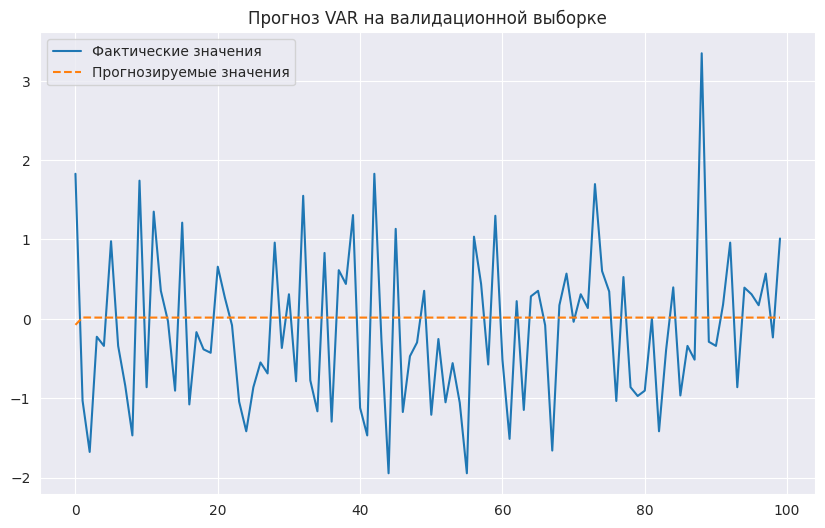

MAE на валидационном наборе: 0.7971370234593089
MSE на валидационном наборе: 0.953960192464845
RMSE на валидационном наборе: 0.9767088575746843


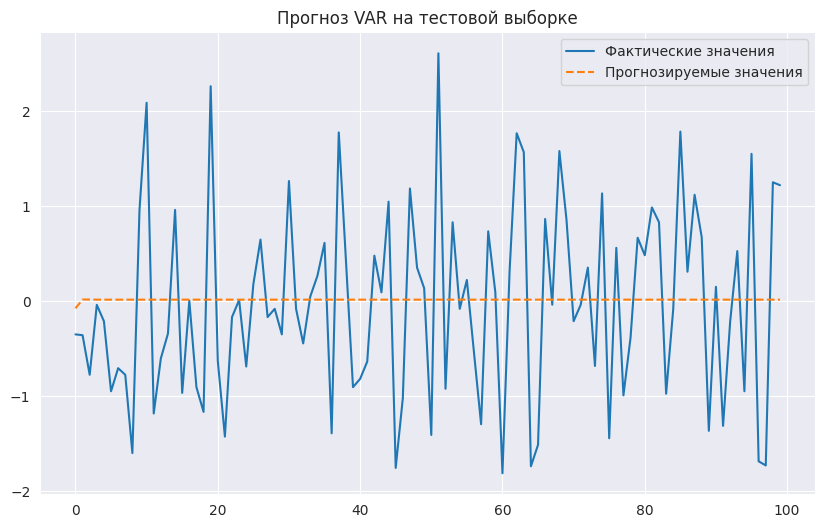

MAE на тестовом наборе: 0.8277970604644063
MSE на тестовом наборе: 1.028068197155679
RMSE на тестовом наборе: 1.0139369788875832
      lb_stat     lb_pvalue
1  151.695195  7.386589e-35
Shapiro-Wilk test: p-value = 7.637892922062946e-61
Breusch-Pagan test: bp_stat = 60.49016770930128, bp_pvalue = 4.292609464089922e-08, f_stat = 4.947603139699845, f_pvalue = 2.082374999821779e-08


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11130.
  res = hypotest_fun_out(*samples, **kwds)


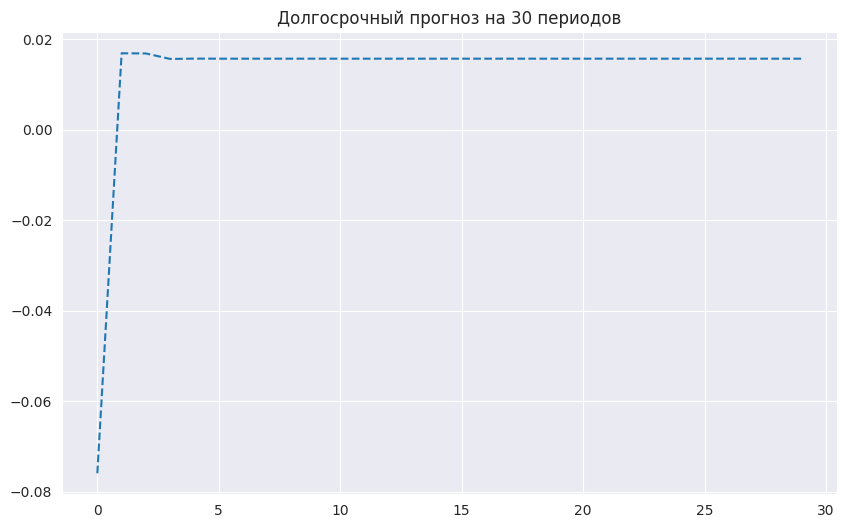

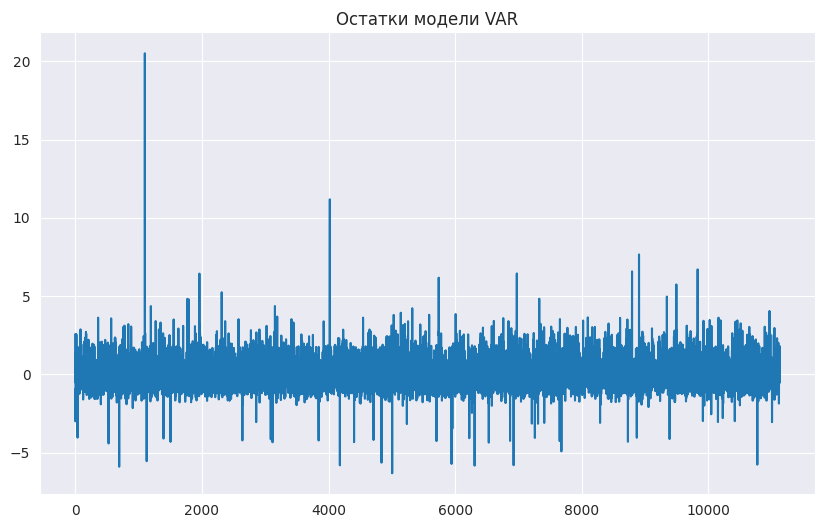

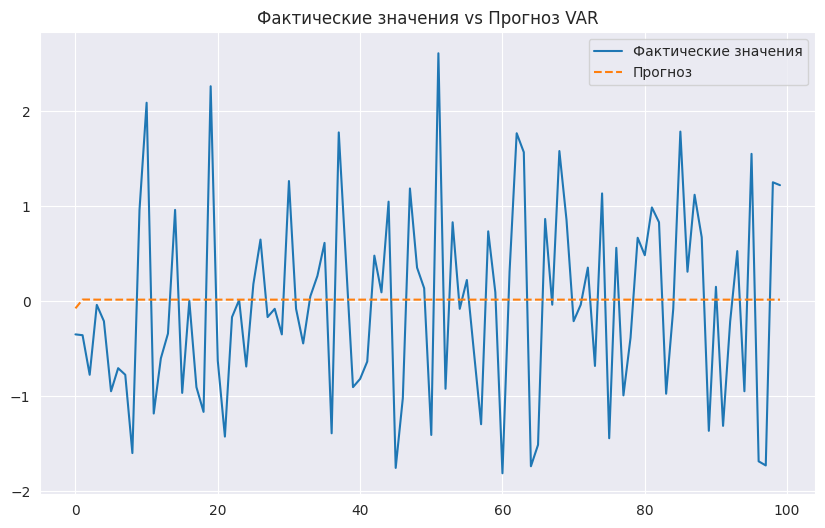

In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_absolute_error, mean_squared_error
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import shapiro


# Шаг 1: Кросс-валидация с подбором гиперпараметров (количество лагов)
tscv = TimeSeriesSplit(n_splits=5)
best_lag_order = None
best_rmse = float('inf')  # Для поиска наилучшего значения RMSE

for train_index, val_index in tscv.split(X_train):
    # Формируем обучающие и валидационные выборки для текущего фолда
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    train_fold_data = pd.concat([X_train_fold, y_train_fold], axis=1)

    # Подбор гиперпараметров: пробуем разное количество лагов
    for lags in range(1, 6):  # Проверяем количество лагов от 1 до 5
        model_fold = VAR(train_fold_data).fit(lags)

        # Прогноз на валидационной выборке для текущего фолда
        predictions = model_fold.forecast(train_fold_data.values[-lags:], steps=len(y_val_fold))

        # Оценка на валидационных данных текущего фолда
        val_rmse = np.sqrt(mean_squared_error(y_val_fold, predictions[:, -1]))

        # Сравниваем текущий результат с лучшим
        if val_rmse < best_rmse:
            best_rmse = val_rmse
            best_lag_order = lags  # Сохраняем лучшее количество лагов

    print(f"Fold результаты: RMSE = {val_rmse} для {lags} лагов")

# Вывод наилучшего числа лагов после кросс-валидации
print(f"Наилучшее количество лагов: {best_lag_order}, с RMSE: {best_rmse}")

# Шаг 2: Обучение модели с наилучшим количеством лагов на всем тренировочном наборе
train_data = pd.concat([X_train, y_train], axis=1)
var_model = VAR(train_data).fit(best_lag_order)

# Шаг 3: Прогноз на валидационном наборе
val_data = pd.concat([X_val, y_val], axis=1)
val_forecast_values = var_model.forecast(train_data.values[-best_lag_order:], steps=len(y_val))

# Визуализация прогноза против фактических значений на валидационном наборе
plt.figure(figsize=(10,6))
plt.plot(y_val.values, label="Фактические значения")
plt.plot(val_forecast_values[:, final_features.index('price')], label="Прогнозируемые значения", linestyle='--')
plt.legend()
plt.title("Прогноз VAR на валидационной выборке")
plt.show()

# Оценка модели на валидационном наборе
val_mae = mean_absolute_error(y_val, val_forecast_values[:, final_features.index('price')])
val_mse = mean_squared_error(y_val, val_forecast_values[:, final_features.index('price')])
val_rmse = np.sqrt(val_mse)

print(f"MAE на валидационном наборе: {val_mae}")
print(f"MSE на валидационном наборе: {val_mse}")
print(f"RMSE на валидационном наборе: {val_rmse}")

# Шаг 4: Прогнозирование на тестовой выборке
test_data = pd.concat([X_test, y_test], axis=1)
forecast_values = var_model.forecast(train_data.values[-best_lag_order:], steps=len(y_test))

# Визуализация прогноза против фактических значений на тестовой выборке
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label="Фактические значения")
plt.plot(forecast_values[:, final_features.index('price')], label="Прогнозируемые значения", linestyle='--')
plt.legend()
plt.title("Прогноз VAR на тестовой выборке")
plt.show()

# Шаг 5: Оценка модели на тестовом наборе
test_mae = mean_absolute_error(y_test, forecast_values[:, final_features.index('price')])
test_mse = mean_squared_error(y_test, forecast_values[:, final_features.index('price')])
test_rmse = np.sqrt(test_mse)

print(f"MAE на тестовом наборе: {test_mae}")
print(f"MSE на тестовом наборе: {test_mse}")
print(f"RMSE на тестовом наборе: {test_rmse}")


# Шаг 6: Диагностика  остатков
residuals = var_model.resid.values.flatten()  # Преобразуем в одномерный массив

# Тест Льюнга-Бокса на автокорреляцию
lb_test = acorr_ljungbox(residuals, lags=[best_lag_order], return_df=True)
print(lb_test)

# Тест Шапиро-Уилка на нормальность остатков
shapiro_test = shapiro(residuals)
print(f"Shapiro-Wilk test: p-value = {shapiro_test.pvalue}")

# Тест Бреуша-Пагана на гомоскедастичность
# Создание DataFrame с остатками и названиями соответствующих признаков
residuals_df = pd.DataFrame(var_model.resid, columns=final_features)

# Удаляем целевую переменную ('price') из списка признаков для построения регрессоров
final_features_no_price = [f for f in final_features if f != 'price']

# Используем только остатки для переменных, кроме целевой ('price')
residuals_var_trimmed = residuals_df[final_features_no_price]

# Добавляем константу для теста
X_const = sm.add_constant(residuals_var_trimmed)

# Тест Бреуша-Пагана
bp_test = het_breuschpagan(residuals_df['price'], X_const)

# Вывод результатов
bp_stat, bp_pvalue, f_stat, f_pvalue = bp_test
print(f"Breusch-Pagan test: bp_stat = {bp_stat}, bp_pvalue = {bp_pvalue}, f_stat = {f_stat}, f_pvalue = {f_pvalue}")

# Шаг 7: Долгосрочные прогнозы
long_term_forecast = var_model.forecast(train_data.values[-best_lag_order:], steps=30)

# Визуализация долгосрочного прогноза
plt.figure(figsize=(10,6))
plt.plot(long_term_forecast[:, final_features.index('price')], label="Долгосрочный прогноз", linestyle='--')
plt.title("Долгосрочный прогноз на 30 периодов")
plt.show()

# Шаг 8: Визуализация остатков и прогнозов
plt.figure(figsize=(10,6))
plt.plot(residuals)
plt.title("Остатки модели VAR")
plt.show()

plt.figure(figsize=(10,6))
plt.plot(y_test.values, label="Фактические значения")
plt.plot(forecast_values[:, final_features.index('price')], label="Прогноз", linestyle='--')
plt.title("Фактические значения vs Прогноз VAR")
plt.legend()
plt.show()

## Модель SARIMAX

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              price   No. Observations:                  796
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -860.186
Date:                            Sat, 12 Oct 2024   AIC                           1756.372
Time:                                    14:29:08   BIC                           1840.308
Sample:                                         0   HQIC                          1788.649
                                            - 796                                         
Covariance Type:                              opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
area              0.3657      0.028     13.025      0.000       0.311       0.421
rooms             0.1613  

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                  796
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -840.051
Date:                Sat, 12 Oct 2024   AIC                           1712.102
Time:                        14:29:38   BIC                           1786.976
Sample:                             0   HQIC                          1740.872
                                - 796                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
area              0.3726      0.029     12.998      0.000       0.316       0.429
rooms             0.1600      0.044      3.660      0.000       0.074       0.246
kitchen_area      0.0661      0.022     

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/

Среднеквадратическая ошибка на сплите: 0.661852797792186


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Среднеквадратическая ошибка на сплите: 0.5399040001751093


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Среднеквадратическая ошибка на сплите: 0.3670952298822068


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Среднеквадратическая ошибка на сплите: 0.421698723767102


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Среднеквадратическая ошибка на сплите: 1.0342138546086939


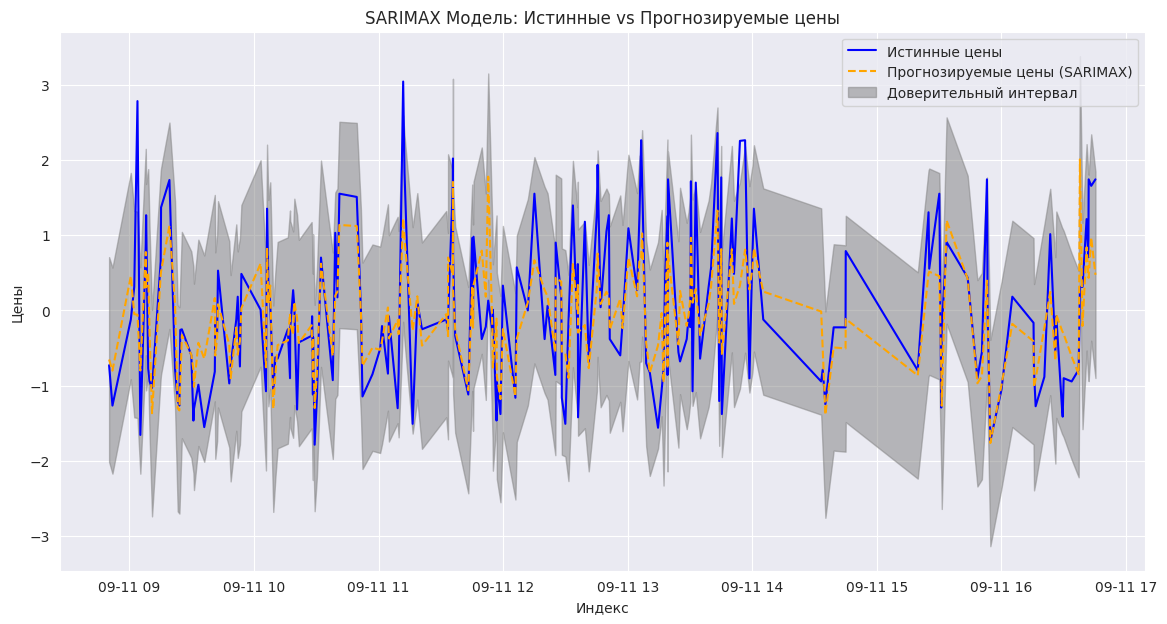

<ipython-input-217-43be94690a4b>:104: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  mape = np.mean(np.abs((sarimax_target_test - predicted_mean) / sarimax_target_test)) * 100  # Средняя абсолютная процентная ошибка
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Среднеквадратичная ошибка (MSE): 0.4946670902980872
Средняя абсолютная ошибка (MAE): 0.5328969493037274
Корень из среднеквадратичной ошибки (RMSE): 0.7033257355579186
Средняя абсолютная процентная ошибка (MAPE): nan%
     lb_stat  lb_pvalue
12  9.407135   0.667818
Shapiro-Wilk test: p-value = 2.2145894597204573e-12
Breusch-Pagan test: bp_stat = 220.1731238176147, bp_pvalue = 9.6023435482884e-40, f_stat = 23.00042037833187, f_pvalue = 6.038728536510385e-47


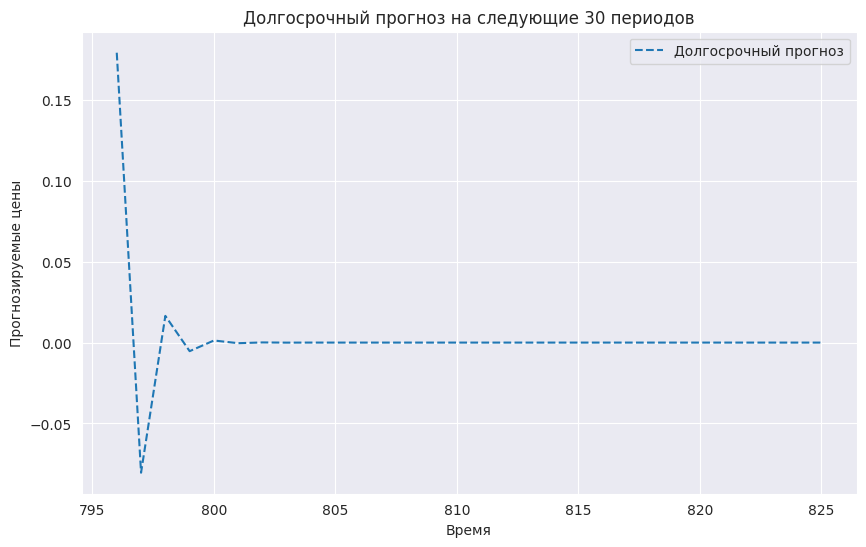

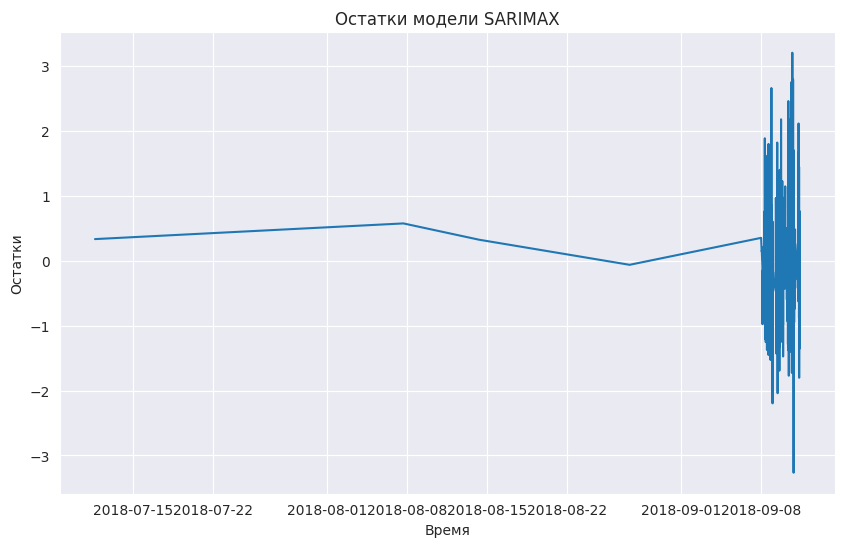

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


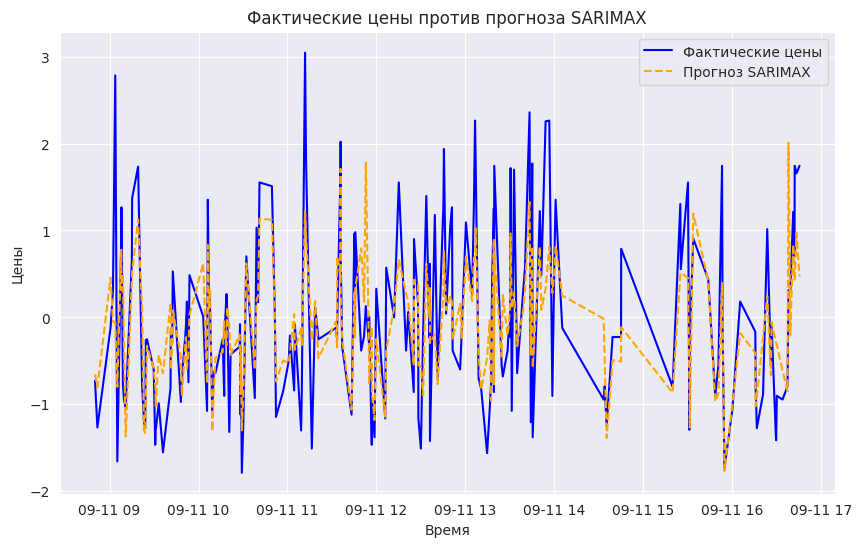

Среднеквадратичная ошибка (MSE): 0.4946670902980872
Средняя абсолютная ошибка (MAE): 0.5328969493037274
Корень из среднеквадратичной ошибки (RMSE): 0.7033257355579186
Средняя абсолютная процентная ошибка (MAPE): nan%


<ipython-input-217-43be94690a4b>:169: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  mape = np.mean(np.abs((sarimax_target_test - predicted_mean) / sarimax_target_test)) * 100


In [217]:
# Импортируем необходимые библиотеки для работы с временными рядами
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
# Импортируем необходимые функции для разделения данных
from sklearn.model_selection import train_test_split
# Импортируем необходимые модули для кросс-валидации
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import numpy as np

# Экзогенные переменные для модели SARIMAX
sarimax_exogenous = final_features
sarimax_data = data[sarimax_exogenous]

# Масштабируем экзогенные переменные
scaler_sarimax_exog = StandardScaler()
sarimax_data_scaled = sarimax_data.copy()

# Масштабируем только экзогенные переменные (все, кроме последней)
sarimax_data_scaled[sarimax_exogenous[:-1]] = scaler_sarimax_exog.fit_transform(sarimax_data[sarimax_exogenous[:-1]])

# Масштабируем целевую переменную отдельно
scaler_sarimax_price = StandardScaler()
sarimax_data_scaled['price'] = scaler_sarimax_price.fit_transform(sarimax_data[['price']])

# Удаление пропусков из данных
sarimax_data = sarimax_data.dropna()

# Целевая переменная для SARIMAX — 'price'
sarimax_target = sarimax_data_scaled['price']
sarimax_data_cleaned = sarimax_data_scaled.drop(columns=['price'])

# Разделение данных на обучающую и тестовую выборки для SARIMAX
sarimax_train, sarimax_test, sarimax_target_train, sarimax_target_test = train_test_split(
    sarimax_data_cleaned, sarimax_target, test_size=0.2, shuffle=False
)

# Настройка модели SARIMAX с порядком (p, d, q) и сезонными параметрами
sarimax_model = SARIMAX(sarimax_target_train, exog=sarimax_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarimax_fitted = sarimax_model.fit()
print(sarimax_fitted.summary())  # Печатаем сводку по модели

# Автоматический подбор параметров для SARIMAX
sarimax_model_auto = auto_arima(sarimax_target_train, exogenous=sarimax_train, seasonal=True, m=12, trace=True)
optimal_order = sarimax_model_auto.order  # Оптимальные параметры (p, d, q)
optimal_seasonal_order = sarimax_model_auto.seasonal_order  # Оптимальные сезонные параметры (P, D, Q, S)

# Применение оптимальных параметров для финальной модели
sarimax_model_opt = SARIMAX(sarimax_target_train, exog=sarimax_train, order=optimal_order, seasonal_order=optimal_seasonal_order)
sarimax_fitted_opt = sarimax_model_opt.fit()
print(sarimax_fitted_opt.summary())  # Печатаем сводку по оптимизированной модели

# Устанавливаем частоту индекса для корректной работы TimeSeriesSplit
sarimax_train.index = sarimax_train.index.to_period('D').to_timestamp()
sarimax_target.index = sarimax_target.index.to_period('D').to_timestamp()

# Кросс-валидация временных рядов
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(sarimax_train):
    sarimax_train_split = sarimax_train.iloc[train_index]  # Обучающая выборка
    sarimax_test_split = sarimax_train.iloc[test_index]  # Тестовая выборка
    sarimax_target_split = sarimax_target.iloc[train_index]  # Целевая переменная для обучающей выборки

    # Выровняем индексы экзогенных переменных и целевой переменной
    sarimax_train_split = sarimax_train_split.reindex(sarimax_target_split.index)

    # Обучение модели на каждом сплите
    sarimax_model_split = SARIMAX(sarimax_target_split, exog=sarimax_train_split,
                                  order=optimal_order, seasonal_order=optimal_seasonal_order)
    sarimax_fitted_split = sarimax_model_split.fit(disp=False)

    # Прогноз на тестовом сплите
    sarimax_forecast_split = sarimax_fitted_split.get_forecast(steps=len(sarimax_test_split), exog=sarimax_test_split)

    # Вычисление среднеквадратичной ошибки
    mse = mean_squared_error(sarimax_target.iloc[test_index], sarimax_forecast_split.predicted_mean)
    print(f"Среднеквадратическая ошибка на сплите: {mse}")

# Прогнозирование на тестовых данных для SARIMAX
sarimax_forecast = sarimax_fitted_opt.get_forecast(steps=len(sarimax_test), exog=sarimax_test)
predicted_mean = sarimax_forecast.predicted_mean
predicted_ci = sarimax_forecast.conf_int()

# Визуализация прогнозов для SARIMAX
plt.figure(figsize=(14, 7))
plt.plot(sarimax_target_test.index, sarimax_target_test, label='Истинные цены', color='blue')  # Истинные значения
plt.plot(sarimax_target_test.index, predicted_mean, label='Прогнозируемые цены (SARIMAX)', color='orange', linestyle='--')  # Прогнозируемые значения
plt.fill_between(sarimax_target_test.index,
                 predicted_ci.iloc[:, 0],
                 predicted_ci.iloc[:, 1],
                 color='gray', alpha=0.5, label='Доверительный интервал')  # Доверительный интервал
plt.title('SARIMAX Модель: Истинные vs Прогнозируемые цены')
plt.xlabel('Индекс')
plt.ylabel('Цены')
plt.legend()
plt.show()

# Оценка качества прогноза
mse = mean_squared_error(sarimax_target_test, predicted_mean)  # Среднеквадратичная ошибка
mae = mean_absolute_error(sarimax_target_test, predicted_mean)  # Средняя абсолютная ошибка
rmse = np.sqrt(mse)  # Корень из среднеквадратичной ошибки
mape = np.mean(np.abs((sarimax_target_test - predicted_mean) / sarimax_target_test)) * 100  # Средняя абсолютная процентная ошибка

print(f'Среднеквадратичная ошибка (MSE): {mse}')  # Вывод MSE
print(f'Средняя абсолютная ошибка (MAE): {mae}')  # Вывод MAE
print(f'Корень из среднеквадратичной ошибки (RMSE): {rmse}')  # Вывод RMSE
print(f'Средняя абсолютная процентная ошибка (MAPE): {mape:.2f}%')  # Вывод MAPE

# Диагностика остатков модели
residuals = sarimax_fitted_opt.resid  # Остатки модели

# Ljung-Box Test для проверки автокорреляции остатков
lb_test = acorr_ljungbox(residuals, lags=[12], return_df=True)
print(lb_test)

# Shapiro-Wilk Test для проверки нормальности остатков
shapiro_test = shapiro(residuals)
print(f"Shapiro-Wilk test: p-value = {shapiro_test.pvalue}")

# Breusch-Pagan Test для проверки гомоскедастичности
residuals_df = pd.DataFrame(residuals, columns=['residuals'])
X_const = sm.add_constant(sarimax_train)  # Добавляем константу к экзогенным переменным

bp_test = het_breuschpagan(residuals_df['residuals'], X_const)  # Тест Бреуша-Пагана
bp_stat, bp_pvalue, f_stat, f_pvalue = bp_test
print(f"Breusch-Pagan test: bp_stat = {bp_stat}, bp_pvalue = {bp_pvalue}, f_stat = {f_stat}, f_pvalue = {f_pvalue}")

# Долгосрочное прогнозирование
long_term_forecast = sarimax_fitted_opt.get_forecast(steps=30, exog=np.zeros((30, sarimax_train.shape[1])))  # Прогноз на 30 шагов вперёд
long_term_predicted_mean = long_term_forecast.predicted_mean
long_term_predicted_ci = long_term_forecast.conf_int()

# Визуализация долгосрочного прогноза
plt.figure(figsize=(10, 6))
plt.plot(long_term_predicted_mean.index, long_term_predicted_mean, label="Долгосрочный прогноз", linestyle='--')
plt.title("Долгосрочный прогноз на следующие 30 периодов")
plt.xlabel('Время')
plt.ylabel('Прогнозируемые цены')
plt.legend()
plt.show()

# Визуализация остатков модели
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title("Остатки модели SARIMAX")
plt.xlabel('Время')
plt.ylabel('Остатки')
plt.show()

# Визуализация фактических значений против прогнозов
sarimax_forecast = sarimax_fitted_opt.get_forecast(steps=len(sarimax_test), exog=sarimax_test)
predicted_mean = sarimax_forecast.predicted_mean

plt.figure(figsize=(10, 6))
plt.plot(sarimax_target_test.index, sarimax_target_test, label="Фактические цены", color='blue')  # Фактические цены
plt.plot(sarimax_target_test.index, predicted_mean, label="Прогноз SARIMAX", linestyle='--', color='orange')  # Прогноз SARIMAX
plt.title("Фактические цены против прогноза SARIMAX")
plt.xlabel('Время')
plt.ylabel('Цены')
plt.legend()
plt.show()

# Оценка качества прогноза (повторно)
mse = mean_squared_error(sarimax_target_test, predicted_mean)
mae = mean_absolute_error(sarimax_target_test, predicted_mean)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((sarimax_target_test - predicted_mean) / sarimax_target_test)) * 100

print(f'Среднеквадратичная ошибка (MSE): {mse}')  # Вывод MSE
print(f'Средняя абсолютная ошибка (MAE): {mae}')  # Вывод MAE
print(f'Корень из среднеквадратичной ошибки (RMSE): {rmse}')  # Вывод RMSE
print(f'Средняя абсолютная процентная ошибка (MAPE): {mape:.2f}%')  # Вывод MAPE

## Модель GARCH

In [ ]:
!pip install arch

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model  # Импорт модели GARCH
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Шаг 2: Подбор гиперпараметров для модели GARCH
best_aic = float('inf')
best_order = None
best_model = None

# Проверяем различные порядки для GARCH (p, q)
for p in range(1, 3):  # Порядок AR
    for q in range(1, 3):  # Порядок MA
        model = arch_model(y_train, vol='Garch', p=p, q=q)
        model_fit = model.fit(disp='off')  # Обучаем модель
        aic = model_fit.aic  # Получаем AIC

        # Сравниваем с лучшим AIC
        if aic < best_aic:
            best_aic = aic
            best_order = (p, q)
            best_model = model_fit

        print(f"Текущий порядок (p={p}, q={q}): AIC = {aic}")

# Вывод наилучшего порядка
print(f"Лучший порядок GARCH: {best_order}, AIC: {best_aic}")

# Шаг 3: Прогнозирование на валидационном наборе
# Предсказываем значения
val_forecast = best_model.forecast(horizon=len(y_val))
y_val_forecast = val_forecast.mean.iloc[-1, :]

# Визуализация прогноза против фактических значений на валидационном наборе
plt.figure(figsize=(10, 6))
plt.plot(y_val.values, label="Фактические значения")
plt.plot(y_val_forecast, label="Прогнозируемые значения", linestyle='--')
plt.legend()
plt.title("Прогноз GARCH на валидационной выборке")
plt.show()

# Шаг 4: Оценка модели на валидационном наборе
val_mae = mean_absolute_error(y_val, y_val_forecast)
val_mse = mean_squared_error(y_val, y_val_forecast)
val_rmse = np.sqrt(val_mse)

print(f"MAE на валидационном наборе: {val_mae}")
print(f"MSE на валидационном наборе: {val_mse}")
print(f"RMSE на валидационном наборе: {val_rmse}")

# Шаг 5: Прогнозирование на тестовой выборке
# Предсказываем значения на тестовом наборе
test_forecast = best_model.forecast(horizon=len(y_test))
y_test_forecast = test_forecast.mean.iloc[-1, :]

# Визуализация прогноза против фактических значений на тестовой выборке
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label="Фактические значения")
plt.plot(y_test_forecast, label="Прогнозируемые значения", linestyle='--')
plt.legend()
plt.title("Прогноз GARCH на тестовой выборке")
plt.show()

# Шаг 6: Проверка остатков
residuals = best_model.resid

# Тест Льюнга-Бокса на автокорреляцию
lb_test = acorr_ljungbox(residuals, lags=[best_order[0]], return_df=True)
print(lb_test)

# Тест Шапиро-Уилка на нормальность остатков
shapiro_test = shapiro(residuals)
print(f"Shapiro-Wilk test: p-value = {shapiro_test.pvalue}")

# Тест Бреуша-Пагана на гомоскедастичность
residuals_df = pd.DataFrame(residuals, columns=['residuals'])
X_const = sm.add_constant(X_train)

# Тест Бреуша-Пагана
'''bp_test = het_breuschpagan(residuals_df['residuals'], X_const)

# Вывод результатов
bp_stat, bp_pvalue, f_stat, f_pvalue = bp_test
print(f"Breusch-Pagan test: bp_stat = {bp_stat}, bp_pvalue = {bp_pvalue}, f_stat = {f_stat}, f_pvalue = {f_pvalue}")
'''
# Шаг 7: Долгосрочные прогнозы
long_term_forecast = best_model.forecast(horizon=30)

# Визуализация долгосрочного прогноза
plt.figure(figsize=(10, 6))
plt.plot(long_term_forecast.mean.iloc[-1, :], label="Долгосрочный прогноз", linestyle='--')
plt.title("Долгосрочный прогноз на 30 периодов")
plt.show()

# Шаг 8: Визуализация остатков
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title("Остатки модели GARCH")
plt.show()

## Модель XGBoost

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Параметры модели XGBoost
xgb_model_params = {
    'objective': 'reg:squarederror',
    'n_estimators': 100,
    'learning_rate': 0.1,
    'max_depth': 5,
    'random_state': 42
}

# Настройка K-Fold кросс-валидации
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Массивы для сохранения метрик
mae_scores = []
mse_scores = []
rmse_scores = []

# K-Fold кросс-валидация
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
    print(f"Fold {fold+1}/{n_splits}")

    # Разделение данных на обучающие и валидационные наборы
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Шаг 1: Обучение модели XGBoost
    xgb_model = XGBRegressor(**xgb_model_params)
    xgb_model.fit(X_train_fold, y_train_fold)

    # Шаг 2: Прогноз на валидационном наборе
    y_val_pred = xgb_model.predict(X_val_fold)

    # Оценка модели на валидационном наборе
    val_mae = mean_absolute_error(y_val_fold, y_val_pred)
    val_mse = mean_squared_error(y_val_fold, y_val_pred)
    val_rmse = np.sqrt(val_mse)

    # Сохранение метрик
    mae_scores.append(val_mae)
    mse_scores.append(val_mse)
    rmse_scores.append(val_rmse)

    print(f"Fold {fold+1}: MAE = {val_mae}, MSE = {val_mse}, RMSE = {val_rmse}")

    # Визуализация прогноза против фактических значений на валидационном наборе
    plt.figure(figsize=(10, 6))
    plt.plot(y_val_fold.values, label="Фактические значения")
    plt.plot(y_val_pred, label="Прогнозируемые значения", linestyle='--')
    plt.legend()
    plt.title(f"Прогноз XGBoost на валидационной выборке (Fold {fold+1})")
    plt.show()

# Средние метрики по всем фолдам
mean_mae = np.mean(mae_scores)
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)

print(f"\nСредние метрики по {n_splits}-фолдовой кросс-валидации:")
print(f"MAE: {mean_mae}")
print(f"MSE: {mean_mse}")
print(f"RMSE: {mean_rmse}")

# Шаг 3: Обучение финальной модели на всех тренировочных данных
xgb_model_final = XGBRegressor(**xgb_model_params)
xgb_model_final.fit(X_train, y_train)

# Прогноз на тестовом наборе
y_test_pred = xgb_model_final.predict(X_test)

# Оценка модели на тестовом наборе
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)

print(f"MAE на тестовом наборе: {test_mae}")
print(f"MSE на тестовом наборе: {test_mse}")
print(f"RMSE на тестовом наборе: {test_rmse}")

# Визуализация прогноза против фактических значений на тестовой выборке
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label="Фактические значения")
plt.plot(y_test_pred, label="Прогнозируемые значения", linestyle='--')
plt.legend()
plt.title("Прогноз XGBoost на тестовой выборке")
plt.show()

# Шаг 4: Прогноз на валидационном наборе
y_val_pred = xgb_model.predict(X_val)

# Оценка модели на валидационном наборе
val_mae = mean_absolute_error(y_val, y_val_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = np.sqrt(val_mse)

print(f"MAE на валидационном наборе: {val_mae}")
print(f"MSE на валидационном наборе: {val_mse}")
print(f"RMSE на валидационном наборе: {val_rmse}")

# Визуализация прогноза против фактических значений на валидационном наборе
plt.figure(figsize=(10, 6))
plt.plot(y_val.values, label="Фактические значения")
plt.plot(y_val_pred, label="Прогнозируемые значения", linestyle='--')
plt.legend()
plt.title("Прогноз XGBoost на валидационной выборке")
plt.show()

# Шаг 5: Визуализация важности признаков
plt.figure(figsize=(10, 6))
plt.barh(final_features_no_price, xgb_model_final.feature_importances_)
plt.title("Важность признаков")
plt.xlabel("Важность")
plt.ylabel("Признаки")
plt.show()

# Шаг 6: Проверка остатков
residuals = y_test - y_test_pred

# Тест Льюнга-Бокса на автокорреляцию
lb_test = acorr_ljungbox(residuals, lags=[5], return_df=True)  # Используем 5 лагов для примера
print("\nТест Льюнга-Бокса на автокорреляцию:")
print(lb_test)

# Тест Шапиро-Уилка на нормальность остатков
shapiro_test = shapiro(residuals)
print(f"\nТест Шапиро-Уилка на нормальность остатков: p-value = {shapiro_test.pvalue}")

# Тест Бреуша-Пагана на гомоскедастичность
X_const = sm.add_constant(X_test)
bp_test = het_breuschpagan(residuals, X_const)

bp_stat, bp_pvalue, f_stat, f_pvalue = bp_test
print(f"\nТест Бреуша-Пагана на гомоскедастичность: bp_stat = {bp_stat}, bp_pvalue = {bp_pvalue}, f_stat = {f_stat}, f_pvalue = {f_pvalue}")

# Шаг 7: Долгосрочные прогнозы (например, на 30 дней)
# Прогнозируем на 30 периодов вперед
long_term_forecast = best_model.forecast(horizon=30)

# Визуализация долгосрочного прогноза
plt.figure(figsize=(10, 6))
plt.plot(long_term_forecast.mean.iloc[-1, :], label="Долгосрочный прогноз на 30 периодов", linestyle='--')
plt.title("Долгосрочный прогноз на 30 периодов")
plt.legend()
plt.show()

# Шаг 8: Визуализация остатков
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title("Остатки модели XGBoost")
plt.show()

# Шаг 9: Визуализация важности признаков
plt.figure(figsize=(10, 6))
plt.barh(final_features_no_price, xgb_model.feature_importances_)
plt.title("Важность признаков в модели XGBoost")
plt.xlabel("Важность")
plt.ylabel("Признаки")
plt.show()

## RNN/GRU

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import KFold
import pandas as pd
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import shapiro
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Шаг 1: Подготовка данных для RNN
# Функция для преобразования данных в формат [samples, time steps, features]
def create_dataset(X, y, time_step=1):
    Xs, ys = [], []
    for i in range(len(X) - time_step):
        Xs.append(X[i:(i + time_step)])
        ys.append(y[i + time_step])
    return np.array(Xs), np.array(ys)

# Определяем количество временных шагов (например, 5)
time_step = 5
X_train_rnn, y_train_rnn = create_dataset(X_train.values, y_train.values, time_step)
X_val_rnn, y_val_rnn = create_dataset(X_val.values, y_val.values, time_step)
X_test_rnn, y_test_rnn = create_dataset(X_test.values, y_test.values, time_step)

# Шаг 2: Создание функции для модели RNN с GRU
def create_model(optimizer='adam', dropout_rate=0.2):
    model = Sequential()
    model.add(GRU(50, return_sequences=True, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(GRU(50, return_sequences=False))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Шаг 3: Подбор гиперпараметров с использованием K-Fold кросс-валидации
# Параметры для подбора
optimizers = ['adam', 'rmsprop']
dropout_rates = [0.2, 0.3]

best_rmse = float('inf')
best_params = {}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for optimizer in optimizers:
    for dropout_rate in dropout_rates:
        fold_rmse = []

        for train_index, val_index in kf.split(X_train_rnn):
            X_train_fold, X_val_fold = X_train_rnn[train_index], X_train_rnn[val_index]
            y_train_fold, y_val_fold = y_train_rnn[train_index], y_train_rnn[val_index]

            model = create_model(optimizer=optimizer, dropout_rate=dropout_rate)
            model.fit(X_train_fold, y_train_fold, epochs=100, batch_size=32, verbose=0)

            val_predictions = model.predict(X_val_fold)
            val_rmse = np.sqrt(mean_squared_error(y_val_fold, val_predictions))
            fold_rmse.append(val_rmse)

        mean_rmse = np.mean(fold_rmse)
        print(f"Параметры: optimizer={optimizer}, dropout_rate={dropout_rate}, RMSE={mean_rmse}")

        if mean_rmse < best_rmse:
            best_rmse = mean_rmse
            best_params = {'optimizer': optimizer, 'dropout_rate': dropout_rate}

print(f"Лучшие параметры: {best_params} с RMSE={best_rmse}")

# Шаг 4: Обучение модели с лучшими параметрами
best_model = create_model(optimizer=best_params['optimizer'], dropout_rate=best_params['dropout_rate'])
history = best_model.fit(X_train_rnn, y_train_rnn, validation_data=(X_val_rnn, y_val_rnn), epochs=100, batch_size=32)

# Шаг 5: Оценка модели на валидационном наборе
val_predictions = best_model.predict(X_val_rnn)

# Визуализация прогноза против фактических значений на валидационном наборе
plt.figure(figsize=(10, 6))
plt.plot(y_val_rnn, label="Фактические значения")
plt.plot(val_predictions, label="Прогнозируемые значения", linestyle='--')
plt.legend()
plt.title("Прогноз GRU на валидационной выборке")
plt.show()

# Оценка модели на валидационном наборе
val_mae = mean_absolute_error(y_val_rnn, val_predictions)
val_mse = mean_squared_error(y_val_rnn, val_predictions)
val_rmse = np.sqrt(val_mse)

print(f"MAE на валидационном наборе: {val_mae}")
print(f"MSE на валидационном наборе: {val_mse}")
print(f"RMSE на валидационном наборе: {val_rmse}")

# Шаг 6: Прогнозирование на тестовой выборке
test_predictions = best_model.predict(X_test_rnn)

# Визуализация прогноза против фактических значений на тестовой выборке
plt.figure(figsize=(10, 6))
plt.plot(y_test_rnn, label="Фактические значения")
plt.plot(test_predictions, label="Прогнозируемые значения", linestyle='--')
plt.legend()
plt.title("Прогноз GRU на тестовой выборке")
plt.show()

# Шаг 7: Оценка модели на тестовом наборе
test_mae = mean_absolute_error(y_test_rnn, test_predictions)
test_mse = mean_squared_error(y_test_rnn, test_predictions)
test_rmse = np.sqrt(test_mse)

print(f"MAE на тестовом наборе: {test_mae}")
print(f"MSE на тестовом наборе: {test_mse}")
print(f"RMSE на тестовом наборе: {test_rmse}")

# Шаг 8: Визуализация потерь во время обучения
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Потери при обучении')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()
plt.show()

# Шаг 9: Проверка остатков
residuals = y_test_rnn - test_predictions.flatten()

# Тест Льюнга-Бокса на автокорреляцию
lb_test = acorr_ljungbox(residuals, lags=[5], return_df=True)
print("\nТест Льюнга-Бокса на автокорреляцию:")
print(lb_test)

# Тест Шапиро-Уилка на нормальность остатков
shapiro_test = shapiro(residuals)
print(f"\nТест Шапиро-Уилка на нормальность остатков: p-value = {shapiro_test.pvalue}")

# Тест Бреуша-Пагана на гомоскедастичность
X_const = sm.add_constant(X_test_rnn.reshape(X_test_rnn.shape[0], -1))  # Добавляем константу
bp_test = het_breuschpagan(residuals, X_const)

bp_stat, bp_pvalue, f_stat, f_pvalue = bp_test
print(f"\nТест Бреуша-Пагана на гомоскедастичность: bp_stat = {bp_stat}, bp_pvalue = {bp_pvalue}, f_stat = {f_stat}, f_pvalue = {f_pvalue}")

# Визуализация остатков
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title("Остатки модели RNN/GRU")
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel("Номер наблюдения")
plt.ylabel("Остатки")
plt.show()

## RNN/LSTM

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import KFold
import pandas as pd
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import shapiro
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Шаг 1: Подготовка данных для RNN
# Функция для преобразования данных в формат [samples, time steps, features]
def create_dataset(X, y, time_step=1):
    Xs, ys = [], []
    for i in range(len(X) - time_step):
        Xs.append(X[i:(i + time_step)])
        ys.append(y[i + time_step])
    return np.array(Xs), np.array(ys)

# Определяем количество временных шагов (например, 5)
time_step = 5
X_train_rnn, y_train_rnn = create_dataset(X_train.values, y_train.values, time_step)
X_val_rnn, y_val_rnn = create_dataset(X_val.values, y_val.values, time_step)
X_test_rnn, y_test_rnn = create_dataset(X_test.values, y_test.values, time_step)

# Шаг 2: Создание функции для модели RNN с LSTM
def create_model(optimizer='adam', dropout_rate=0.2):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Шаг 3: Подбор гиперпараметров с использованием K-Fold кросс-валидации
# Параметры для подбора
optimizers = ['adam', 'rmsprop']
dropout_rates = [0.2, 0.3]

best_rmse = float('inf')
best_params = {}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for optimizer in optimizers:
    for dropout_rate in dropout_rates:
        fold_rmse = []

        for train_index, val_index in kf.split(X_train_rnn):
            X_train_fold, X_val_fold = X_train_rnn[train_index], X_train_rnn[val_index]
            y_train_fold, y_val_fold = y_train_rnn[train_index], y_train_rnn[val_index]

            model = create_model(optimizer=optimizer, dropout_rate=dropout_rate)
            model.fit(X_train_fold, y_train_fold, epochs=100, batch_size=32, verbose=0)

            val_predictions = model.predict(X_val_fold)
            val_rmse = np.sqrt(mean_squared_error(y_val_fold, val_predictions))
            fold_rmse.append(val_rmse)

        mean_rmse = np.mean(fold_rmse)
        print(f"Параметры: optimizer={optimizer}, dropout_rate={dropout_rate}, RMSE={mean_rmse}")

        if mean_rmse < best_rmse:
            best_rmse = mean_rmse
            best_params = {'optimizer': optimizer, 'dropout_rate': dropout_rate}

print(f"Лучшие параметры: {best_params} с RMSE={best_rmse}")

# Шаг 4: Обучение модели с лучшими параметрами
best_model = create_model(optimizer=best_params['optimizer'], dropout_rate=best_params['dropout_rate'])
history = best_model.fit(X_train_rnn, y_train_rnn, validation_data=(X_val_rnn, y_val_rnn), epochs=100, batch_size=32)

# Шаг 5: Оценка модели на валидационном наборе
val_predictions = best_model.predict(X_val_rnn)

# Визуализация прогноза против фактических значений на валидационном наборе
plt.figure(figsize=(10, 6))
plt.plot(y_val_rnn, label="Фактические значения")
plt.plot(val_predictions, label="Прогнозируемые значения", linestyle='--')
plt.legend()
plt.title("Прогноз LSTM на валидационной выборке")
plt.show()

# Оценка модели на валидационном наборе
val_mae = mean_absolute_error(y_val_rnn, val_predictions)
val_mse = mean_squared_error(y_val_rnn, val_predictions)
val_rmse = np.sqrt(val_mse)

print(f"MAE на валидационном наборе: {val_mae}")
print(f"MSE на валидационном наборе: {val_mse}")
print(f"RMSE на валидационном наборе: {val_rmse}")

# Шаг 6: Прогнозирование на тестовой выборке
test_predictions = best_model.predict(X_test_rnn)

# Визуализация прогноза против фактических значений на тестовой выборке
plt.figure(figsize=(10, 6))
plt.plot(y_test_rnn, label="Фактические значения")
plt.plot(test_predictions, label="Прогнозируемые значения", linestyle='--')
plt.legend()
plt.title("Прогноз LSTM на тестовой выборке")
plt.show()

# Шаг 7: Оценка модели на тестовом наборе
test_mae = mean_absolute_error(y_test_rnn, test_predictions)
test_mse = mean_squared_error(y_test_rnn, test_predictions)
test_rmse = np.sqrt(test_mse)

print(f"MAE на тестовом наборе: {test_mae}")
print(f"MSE на тестовом наборе: {test_mse}")
print(f"RMSE на тестовом наборе: {test_rmse}")

# Шаг 8: Визуализация потерь во время обучения
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Потери при обучении')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()
plt.show()

# Шаг 9: Проверка остатков
residuals = y_test_rnn - test_predictions.flatten()

# Тест Льюнга-Бокса на автокорреляцию
lb_test = acorr_ljungbox(residuals, lags=[5], return_df=True)
print("\nТест Льюнга-Бокса на автокорреляцию:")
print(lb_test)

# Тест Шапиро-Уилка на нормальность остатков
shapiro_test = shapiro(residuals)
print(f"\nТест Шапиро-Уилка на нормальность остатков: p-value = {shapiro_test.pvalue}")

# Тест Бреуша-Пагана на гомоскедастичность
X_const = sm.add_constant(X_test_rnn.reshape(X_test_rnn.shape[0], -1))  # Добавляем константу
bp_test = het_breuschpagan(residuals, X_const)

bp_stat, bp_pvalue, f_stat, f_pvalue = bp_test
print(f"\nТест Бреуша-Пагана на гомоскедастичность: bp_stat = {bp_stat}, bp_pvalue = {bp_pvalue}, f_stat = {f_stat}, f_pvalue = {f_pvalue}")

# Визуализация остатков
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title("Остатки модели RNN/LSTM")
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel("Номер наблюдения")
plt.ylabel("Остатки")
plt.show()

## RNN/Bidirectional

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import KFold
import pandas as pd
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import shapiro
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Шаг 1: Подготовка данных для RNN
# Функция для преобразования данных в формат [samples, time steps, features]
def create_dataset(X, y, time_step=1):
    Xs, ys = [], []
    for i in range(len(X) - time_step):
        Xs.append(X[i:(i + time_step)])
        ys.append(y[i + time_step])
    return np.array(Xs), np.array(ys)

# Определяем количество временных шагов (например, 5)
time_step = 5
X_train_rnn, y_train_rnn = create_dataset(X_train.values, y_train.values, time_step)
X_val_rnn, y_val_rnn = create_dataset(X_val.values, y_val.values, time_step)
X_test_rnn, y_test_rnn = create_dataset(X_test.values, y_test.values, time_step)

# Шаг 2: Создание функции для модели RNN с двунаправленным LSTM
def create_model(optimizer='adam', dropout_rate=0.2):
    model = Sequential()
    # Первый двунаправленный слой
    model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
    model.add(Dropout(dropout_rate))
    # Второй двунаправленный слой
    model.add(Bidirectional(LSTM(50, return_sequences=False)))
    model.add(Dropout(dropout_rate))
    # Выходной слой
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Шаг 3: Подбор гиперпараметров с использованием K-Fold кросс-валидации
# Параметры для подбора
optimizers = ['adam', 'rmsprop']
dropout_rates = [0.2, 0.3]

best_rmse = float('inf')
best_params = {}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for optimizer in optimizers:
    for dropout_rate in dropout_rates:
        fold_rmse = []

        for train_index, val_index in kf.split(X_train_rnn):
            X_train_fold, X_val_fold = X_train_rnn[train_index], X_train_rnn[val_index]
            y_train_fold, y_val_fold = y_train_rnn[train_index], y_train_rnn[val_index]

            model = create_model(optimizer=optimizer, dropout_rate=dropout_rate)
            model.fit(X_train_fold, y_train_fold, epochs=100, batch_size=32, verbose=0)

            val_predictions = model.predict(X_val_fold)
            val_rmse = np.sqrt(mean_squared_error(y_val_fold, val_predictions))
            fold_rmse.append(val_rmse)

        mean_rmse = np.mean(fold_rmse)
        print(f"Параметры: optimizer={optimizer}, dropout_rate={dropout_rate}, RMSE={mean_rmse}")

        if mean_rmse < best_rmse:
            best_rmse = mean_rmse
            best_params = {'optimizer': optimizer, 'dropout_rate': dropout_rate}

print(f"Лучшие параметры: {best_params} с RMSE={best_rmse}")

# Шаг 4: Обучение модели с лучшими параметрами
best_model = create_model(optimizer=best_params['optimizer'], dropout_rate=best_params['dropout_rate'])
history = best_model.fit(X_train_rnn, y_train_rnn, validation_data=(X_val_rnn, y_val_rnn), epochs=100, batch_size=32)

# Шаг 5: Оценка модели на валидационном наборе
val_predictions = best_model.predict(X_val_rnn)

# Визуализация прогноза против фактических значений на валидационном наборе
plt.figure(figsize=(10, 6))
plt.plot(y_val_rnn, label="Фактические значения")
plt.plot(val_predictions, label="Прогнозируемые значения", linestyle='--')
plt.legend()
plt.title("Прогноз Bidirectional LSTM на валидационной выборке")
plt.show()

# Оценка модели на валидационном наборе
val_mae = mean_absolute_error(y_val_rnn, val_predictions)
val_mse = mean_squared_error(y_val_rnn, val_predictions)
val_rmse = np.sqrt(val_mse)

print(f"MAE на валидационном наборе: {val_mae}")
print(f"MSE на валидационном наборе: {val_mse}")
print(f"RMSE на валидационном наборе: {val_rmse}")

# Шаг 6: Прогнозирование на тестовой выборке
test_predictions = best_model.predict(X_test_rnn)

# Визуализация прогноза против фактических значений на тестовой выборке
plt.figure(figsize=(10, 6))
plt.plot(y_test_rnn, label="Фактические значения")
plt.plot(test_predictions, label="Прогнозируемые значения", linestyle='--')
plt.legend()
plt.title("Прогноз Bidirectional LSTM на тестовой выборке")
plt.show()

# Шаг 7: Оценка модели на тестовом наборе
test_mae = mean_absolute_error(y_test_rnn, test_predictions)
test_mse = mean_squared_error(y_test_rnn, test_predictions)
test_rmse = np.sqrt(test_mse)

print(f"MAE на тестовом наборе: {test_mae}")
print(f"MSE на тестовом наборе: {test_mse}")
print(f"RMSE на тестовом наборе: {test_rmse}")

# Шаг 8: Визуализация потерь во время обучения
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Потери при обучении')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()
plt.show()

# Шаг 9: Проверка остатков
residuals = y_test_rnn - test_predictions.flatten()

# Тест Льюнга-Бокса на автокорреляцию
lb_test = acorr_ljungbox(residuals, lags=[5], return_df=True)
print("\nТест Льюнга-Бокса на автокорреляцию:")
print(lb_test)

# Тест Шапиро-Уилка на нормальность остатков
shapiro_test = shapiro(residuals)
print(f"\nТест Шапиро-Уилка на нормальность остатков: p-value = {shapiro_test.pvalue}")

# Тест Бреуша-Пагана на гомоскедастичность
X_const = sm.add_constant(X_test_rnn.reshape(X_test_rnn.shape[0], -1))  # Добавляем константу
bp_test = het_breuschpagan(residuals, X_const)

bp_stat, bp_pvalue, f_stat, f_pvalue = bp_test
print(f"\nТест Бреуша-Пагана на гомоскедастичность: bp_stat = {bp_stat}, bp_pvalue = {bp_pvalue}, f_stat = {f_stat}, f_pvalue = {f_pvalue}")

# Визуализация остатков
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title("Остатки модели RNN/Bidirectional LSTM")
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel("Номер наблюдения")
plt.ylabel("Остатки")
plt.show()

## (LSTM, GRU, Bidirectional)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Bidirectional
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import KFold
import pandas as pd
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import shapiro
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Шаг 1: Подготовка данных для RNN
# Функция для преобразования данных в формат [samples, time steps, features]
def create_dataset(X, y, time_step=1):
    Xs, ys = [], []
    for i in range(len(X) - time_step):
        Xs.append(X[i:(i + time_step)])
        ys.append(y[i + time_step])
    return np.array(Xs), np.array(ys)

# Определяем количество временных шагов (например, 5)
time_step = 5
X_train_rnn, y_train_rnn = create_dataset(X_train.values, y_train.values, time_step)
X_val_rnn, y_val_rnn = create_dataset(X_val.values, y_val.values, time_step)
X_test_rnn, y_test_rnn = create_dataset(X_test.values, y_test.values, time_step)

# Шаг 2: Создание гибридной модели с LSTM, GRU и двунаправленным слоем
def create_hybrid_model(optimizer='adam', dropout_rate=0.2):
    model = Sequential()
    # Первый слой - двунаправленный LSTM
    model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
    model.add(Dropout(dropout_rate))

    # Второй слой - GRU
    model.add(GRU(50, return_sequences=True))
    model.add(Dropout(dropout_rate))

    # Третий слой - обычный LSTM
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(dropout_rate))

    # Выходной слой
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Шаг 3: Подбор гиперпараметров с использованием K-Fold кросс-валидации
# Параметры для подбора
optimizers = ['adam', 'rmsprop']
dropout_rates = [0.2, 0.3]

best_rmse = float('inf')
best_params = {}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for optimizer in optimizers:
    for dropout_rate in dropout_rates:
        fold_rmse = []

        for train_index, val_index in kf.split(X_train_rnn):
            X_train_fold, X_val_fold = X_train_rnn[train_index], X_train_rnn[val_index]
            y_train_fold, y_val_fold = y_train_rnn[train_index], y_train_rnn[val_index]

            model = create_hybrid_model(optimizer=optimizer, dropout_rate=dropout_rate)
            model.fit(X_train_fold, y_train_fold, epochs=100, batch_size=32, verbose=0)

            val_predictions = model.predict(X_val_fold)
            val_rmse = np.sqrt(mean_squared_error(y_val_fold, val_predictions))
            fold_rmse.append(val_rmse)

        mean_rmse = np.mean(fold_rmse)
        print(f"Параметры: optimizer={optimizer}, dropout_rate={dropout_rate}, RMSE={mean_rmse}")

        if mean_rmse < best_rmse:
            best_rmse = mean_rmse
            best_params = {'optimizer': optimizer, 'dropout_rate': dropout_rate}

print(f"Лучшие параметры: {best_params} с RMSE={best_rmse}")

# Шаг 4: Обучение модели с лучшими параметрами
best_model = create_hybrid_model(optimizer=best_params['optimizer'], dropout_rate=best_params['dropout_rate'])
history = best_model.fit(X_train_rnn, y_train_rnn, validation_data=(X_val_rnn, y_val_rnn), epochs=100, batch_size=32)

# Шаг 5: Оценка модели на валидационном наборе
val_predictions = best_model.predict(X_val_rnn)

# Визуализация прогноза против фактических значений на валидационном наборе
plt.figure(figsize=(10, 6))
plt.plot(y_val_rnn, label="Фактические значения")
plt.plot(val_predictions, label="Прогнозируемые значения", linestyle='--')
plt.legend()
plt.title("Прогноз гибридной модели на валидационной выборке")
plt.show()

# Оценка модели на валидационном наборе
val_mae = mean_absolute_error(y_val_rnn, val_predictions)
val_mse = mean_squared_error(y_val_rnn, val_predictions)
val_rmse = np.sqrt(val_mse)

print(f"MAE на валидационном наборе: {val_mae}")
print(f"MSE на валидационном наборе: {val_mse}")
print(f"RMSE на валидационном наборе: {val_rmse}")

# Шаг 6: Прогнозирование на тестовой выборке
test_predictions = best_model.predict(X_test_rnn)

# Визуализация прогноза против фактических значений на тестовой выборке
plt.figure(figsize=(10, 6))
plt.plot(y_test_rnn, label="Фактические значения")
plt.plot(test_predictions, label="Прогнозируемые значения", linestyle='--')
plt.legend()
plt.title("Прогноз гибридной модели на тестовой выборке")
plt.show()

# Шаг 7: Оценка модели на тестовом наборе
test_mae = mean_absolute_error(y_test_rnn, test_predictions)
test_mse = mean_squared_error(y_test_rnn, test_predictions)
test_rmse = np.sqrt(test_mse)

print(f"MAE на тестовом наборе: {test_mae}")
print(f"MSE на тестовом наборе: {test_mse}")
print(f"RMSE на тестовом наборе: {test_rmse}")

# Шаг 8: Визуализация потерь во время обучения
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Потери при обучении гибридной модели')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()
plt.show()

# Шаг 9: Проверка остатков
residuals = y_test_rnn - test_predictions.flatten()

# Тест Льюнга-Бокса на автокорреляцию
lb_test = acorr_ljungbox(residuals, lags=[5], return_df=True)
print("\nТест Льюнга-Бокса на автокорреляцию:")
print(lb_test)

# Тест Шапиро-Уилка на нормальность остатков
shapiro_test = shapiro(residuals)
print(f"\nТест Шапиро-Уилка на нормальность остатков: p-value = {shapiro_test.pvalue}")

# Тест Бреуша-Пагана на гомоскедастичность
X_const = sm.add_constant(X_test_rnn.reshape(X_test_rnn.shape[0], -1))  # Добавляем константу
bp_test = het_breuschpagan(residuals, X_const)

bp_stat, bp_pvalue, f_stat, f_pvalue = bp_test
print(f"\nТест Бреуша-Пагана на гомоскедастичность: bp_stat = {bp_stat}, bp_pvalue = {bp_pvalue}, f_stat = {f_stat}, f_pvalue = {f_pvalue}")

# Визуализация остатков
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title("Остатки гибридной модели RNN")
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel("Номер наблюдения")
plt.ylabel("Остатки")
plt.show()

# CNN

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import KFold
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import shapiro
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Функция для преобразования данных в формат [samples, time steps, features]
def create_dataset(X, y, time_step=1):
    Xs, ys = [], []
    for i in range(len(X) - time_step):
        Xs.append(X[i:(i + time_step)])
        ys.append(y[i + time_step])
    return np.array(Xs), np.array(ys)

# Определяем количество временных шагов (например, 5)
time_step = 5
X_train_cnn, y_train_cnn = create_dataset(X_train.values, y_train.values, time_step)
X_val_cnn, y_val_cnn = create_dataset(X_val.values, y_val.values, time_step)
X_test_cnn, y_test_cnn = create_dataset(X_test.values, y_test.values, time_step)

# Проверяем размерности данных
print(f'Размер X_train_cnn: {X_train_cnn.shape}')
print(f'Размер y_train_cnn: {y_train_cnn.shape}')

# Функция для создания модели CNN
def create_model(optimizer='adam', dropout_rate=0.2):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(dropout_rate))

    model.add(Conv1D(filters=32, kernel_size=2, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dropout(dropout_rate))

    model.add(Dense(50, activation='relu'))
    model.add(Dropout(dropout_rate))

    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Параметры для подбора
optimizers = ['adam', 'rmsprop']
dropout_rates = [0.2, 0.3]

best_rmse = float('inf')
best_params = {}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for optimizer in optimizers:
    for dropout_rate in dropout_rates:
        fold_rmse = []

        for train_index, val_index in kf.split(X_train_cnn):
            X_train_fold, X_val_fold = X_train_cnn[train_index], X_train_cnn[val_index]
            y_train_fold, y_val_fold = y_train_cnn[train_index], y_train_cnn[val_index]

            model = create_model(optimizer=optimizer, dropout_rate=dropout_rate)
            model.fit(X_train_fold, y_train_fold, epochs=100, batch_size=32, verbose=0)

            val_predictions = model.predict(X_val_fold)
            val_rmse = np.sqrt(mean_squared_error(y_val_fold, val_predictions))
            fold_rmse.append(val_rmse)

        mean_rmse = np.mean(fold_rmse)
        print(f"Параметры: optimizer={optimizer}, dropout_rate={dropout_rate}, RMSE={mean_rmse}")

        if mean_rmse < best_rmse:
            best_rmse = mean_rmse
            best_params = {'optimizer': optimizer, 'dropout_rate': dropout_rate}

print(f"Лучшие параметры: {best_params} с RMSE={best_rmse}")

# Обучение модели с лучшими параметрами
best_model = create_model(optimizer=best_params['optimizer'], dropout_rate=best_params['dropout_rate'])
history = best_model.fit(X_train_cnn, y_train_cnn, validation_data=(X_val_cnn, y_val_cnn), epochs=100, batch_size=32)

# Оценка модели на валидационном наборе
val_predictions = best_model.predict(X_val_cnn)

# Визуализация прогноза против фактических значений на валидационной выборке
plt.figure(figsize=(10, 6))
plt.plot(y_val_cnn, label="Фактические значения")
plt.plot(val_predictions, label="Прогнозируемые значения", linestyle='--')
plt.legend()
plt.title("Прогноз CNN на валидационной выборке")
plt.show()

# Оценка модели на валидационном наборе
val_mae = mean_absolute_error(y_val_cnn, val_predictions)
val_mse = mean_squared_error(y_val_cnn, val_predictions)
val_rmse = np.sqrt(val_mse)

print(f"MAE на валидационном наборе: {val_mae}")
print(f"MSE на валидационном наборе: {val_mse}")
print(f"RMSE на валидационном наборе: {val_rmse}")

# Прогнозирование на тестовой выборке
test_predictions = best_model.predict(X_test_cnn)

# Визуализация прогноза против фактических значений на тестовой выборке
plt.figure(figsize=(10, 6))
plt.plot(y_test_cnn, label="Фактические значения")
plt.plot(test_predictions, label="Прогнозируемые значения", linestyle='--')
plt.legend()
plt.title("Прогноз CNN на тестовой выборке")
plt.show()

# Оценка модели на тестовом наборе
test_mae = mean_absolute_error(y_test_cnn, test_predictions)
test_mse = mean_squared_error(y_test_cnn, test_predictions)
test_rmse = np.sqrt(test_mse)

print(f"MAE на тестовом наборе: {test_mae}")
print(f"MSE на тестовом наборе: {test_mse}")
print(f"RMSE на тестовом наборе: {test_rmse}")

# Визуализация потерь во время обучения
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Потери при обучении модели CNN')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()
plt.show()

# Диагностика остатков
residuals = y_test_cnn - test_predictions.flatten()

# Тест Льюнга-Бокса на автокорреляцию
lb_test = acorr_ljungbox(residuals, lags=[5], return_df=True)
print("\nТест Льюнга-Бокса на автокорреляцию:")
print(lb_test)

# Тест Шапиро-Уилка на нормальность остатков
shapiro_test = shapiro(residuals)
print(f"\nТест Шапиро-Уилка на нормальность остатков: p-value = {shapiro_test.pvalue}")

# Тест Бреуша-Пагана на гомоскедастичность
X_const = sm.add_constant(X_test_cnn.reshape(X_test_cnn.shape[0], -1))  # Добавляем константу
bp_test = het_breuschpagan(residuals, X_const)

bp_stat, bp_pvalue, f_stat, f_pvalue = bp_test
print(f"\nТест Бреуша-Пагана на гомоскедастичность: bp_stat = {bp_stat}, bp_pvalue = {bp_pvalue}, f_stat = {f_stat}, f_pvalue = {f_pvalue}")

# Визуализация остатков
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title("Остатки модели CNN")
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel("Номер наблюдения")
plt.ylabel("Остатки")
plt.show()

## Transformers

In [ ]:
# Установка необходимых библиотек
!pip install transformers datasets torch scikit-learn

In [ ]:
!pip install --upgrade pyarrow

!pip install --upgrade datasets transformers

!pip install pyarrow==12.0.1  # Example version
!pip install datasets==2.14.0
!pip install transformers==4.33.0

!pip install datasets --no-deps

In [ ]:
!pip install optuna

In [ ]:
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments
from datasets import Dataset
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import adfuller
from scipy.stats import jarque_bera
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import optuna

# Подготовка данных
# df должен быть DataFrame с вашими данными
# Используем sample_size строк для анализа (не забудьте определить sample_size)
df = df.head(500)

# Создание текстового представления для модели
df['text'] = df.apply(lambda row: f"Area: {row['area']} Rooms: {row['rooms']} Building Type: {row['building_type']}", axis=1)

# Определяем целевую переменную и признаки
X = df['text'].tolist()
y = df[target].values  # Используем целевую переменную из вашего DataFrame

# Разделение данных на обучающую, валидационную и тестовую выборки
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Подготовка токенизатора и данных для модели
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
train_encodings = tokenizer(X_train, truncation=True, padding=True)
val_encodings = tokenizer(X_val, truncation=True, padding=True)
test_encodings = tokenizer(X_test, truncation=True, padding=True)

# Создание наборов данных
train_dataset = Dataset.from_dict({
    "input_ids": train_encodings['input_ids'],
    "attention_mask": train_encodings['attention_mask'],
    "labels": y_train.tolist()  # Преобразование в список
})

val_dataset = Dataset.from_dict({
    "input_ids": val_encodings['input_ids'],
    "attention_mask": val_encodings['attention_mask'],
    "labels": y_val.tolist()  # Преобразование в список
})

test_dataset = Dataset.from_dict({
    "input_ids": test_encodings['input_ids'],
    "attention_mask": test_encodings['attention_mask'],
    "labels": y_test.tolist()  # Преобразование в список
})

# Функция для создания модели
def model_init():
    return AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=1)

# Оптимизация гиперпараметров с помощью Optuna
def optuna_objective(trial):
    # Подбор гиперпараметров
    num_train_epochs = trial.suggest_int("num_train_epochs", 1, 5)
    per_device_train_batch_size = trial.suggest_categorical("per_device_train_batch_size", [8, 16, 32])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 5e-5)
    weight_decay = trial.suggest_loguniform("weight_decay", 0.01, 0.3)

    # Настройка аргументов тренировки
    training_args = TrainingArguments(
        output_dir='./results',
        num_train_epochs=num_train_epochs,
        per_device_train_batch_size=per_device_train_batch_size,
        per_device_eval_batch_size=16,
        warmup_steps=500,
        weight_decay=weight_decay,
        learning_rate=learning_rate,
        logging_dir='./logs',
        logging_steps=10,
        evaluation_strategy="epoch"
    )

    # Trainer
    trainer = Trainer(
        model_init=model_init,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset
    )

    # Обучение модели
    trainer.train()

    # Оценка на валидационных данных
    eval_results = trainer.evaluate(val_dataset)

    # Целевая метрика — минимизация потерь
    return eval_results["eval_loss"]

# Запуск Optuna для подбора гиперпараметров
study = optuna.create_study(direction="minimize")
study.optimize(optuna_objective, n_trials=10)

# Вывод лучших гиперпараметров
print(f"Лучшие гиперпараметры: {study.best_params}")

# Применение лучших гиперпараметров для обучения финальной модели
best_params = study.best_params
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=best_params['num_train_epochs'],
    per_device_train_batch_size=best_params['per_device_train_batch_size'],
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=best_params['weight_decay'],
    learning_rate=best_params['learning_rate'],
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch"
)

# Создаем Trainer с оптимальными гиперпараметрами
trainer = Trainer(
    model_init=model_init,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)

# Обучение модели с оптимальными гиперпараметрами
trainer.train()

# Прогнозирование на тестовых данных
predictions = trainer.predict(test_dataset)
predicted_prices = predictions.predictions.flatten()

# Оценка качества прогноза
mse = mean_squared_error(y_test, predicted_prices)
mae = np.mean(np.abs(y_test - predicted_prices))
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, predicted_prices)

# Вывод результатов
print(f'Среднеквадратичная ошибка (MSE): {mse}')
print(f'Средняя абсолютная ошибка (MAE): {mae}')
print(f'Корень из среднеквадратичной ошибки (RMSE): {rmse}')
print(f'Средняя абсолютная процентная ошибка (MAPE): {mape * 100:.2f}%')

# Вычисляем остатки
residuals = y_test - predicted_prices

# 1. Q-тест Льюнга-Бокса для остатков
lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print(f"Q-тест Льюнга-Бокса: \n{lb_test}")

# 2. Тест Жарка-Бера на нормальность остатков
jb_stat, jb_pvalue = jarque_bera(residuals)
print(f"Тест Жарка-Бера: JB-статистика={jb_stat}, p-value={jb_pvalue}")

# 3. Тест на автокорреляцию остатков (Lagrange multiplier test)
lagrange_test = sm.stats.diagnostic.het_breuschpagan(residuals, sm.add_constant(predicted_prices))
print(f"Lagrange multiplier statistic: {lagrange_test[0]}, p-value: {lagrange_test[1]}, f-value: {lagrange_test[2]}, f p-value: {lagrange_test[3]}")

# 4. ADF-тест на стационарность остатков
adf_stat, adf_pvalue, _, _, _, _ = adfuller(residuals)
print(f"ADF-тест: ADF-статистика={adf_stat}, p-value={adf_pvalue}")

# Визуализация результатов
plt.figure(figsize=(14, 7))
plt.plot(range(len(y_test)), y_test, label='Истинные цены', color='blue')
plt.plot(range(len(predicted_prices)), predicted_prices, label='Прогнозируемые цены', color='red')

plt.title('Прогнозирование цен с использованием модели на основе BERT')
plt.xlabel('Индекс')
plt.ylabel('Цены')
plt.legend()
plt.show()

# Визуализация остатков
plt.figure(figsize=(12, 6))

# 1. Гистограмма остатков
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True, color='blue', bins=30)
plt.title('Гистограмма остатков')

# 2. Остатки против времени
plt.subplot(1, 2, 2)
plt.plot(residuals, marker='o', linestyle='-', color='blue')
plt.title('Остатки против времени')

plt.tight_layout()
plt.show()

# ACF и PACF
plt.figure(figsize=(12, 6))

# 3. ACF
plt.subplot(1, 2, 1)
plot_acf(residuals, lags=30, ax=plt.gca())
plt.title('ACF остатков')

# 4. PACF
plt.subplot(1, 2, 2)
plot_pacf(residuals, lags=30, ax=plt.gca())
plt.title('PACF остатков')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments
from datasets import Dataset
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import adfuller
from scipy.stats import jarque_bera
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import optuna

# Подготовка данных
# df должен быть DataFrame с вашими данными
# Используем sample_size строк для анализа (не забудьте определить sample_size)
df = data.head(sample_size)

df['text'] = df.apply(
    lambda row: ' '.join([f"{feature}: {row[feature]}" for feature in final_features]),
    axis=1
)

# Определяем целевую переменную и признаки
X = df['text'].tolist()
y = df[target].values  # Используем целевую переменную из вашего DataFrame

# Подготовка токенизатора
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

# Функция для создания модели
def model_init():
    return AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=1)

# Оптимизация гиперпараметров с помощью Optuna
def optuna_objective(trial):
    # Подбор гиперпараметров
    num_train_epochs = trial.suggest_int("num_train_epochs", 1, 5)
    per_device_train_batch_size = trial.suggest_categorical("per_device_train_batch_size", [8, 16, 32])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 5e-5)
    weight_decay = trial.suggest_loguniform("weight_decay", 0.01, 0.3)

    # K-Fold кросс-валидация
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    fold_metrics = []

    for train_index, val_index in kf.split(X):
        X_train_fold, X_val_fold = np.array(X)[train_index], np.array(X)[val_index]
        y_train_fold, y_val_fold = y[train_index], y[val_index]

        # Подготовка данных
        train_encodings = tokenizer(X_train_fold.tolist(), truncation=True, padding=True)
        val_encodings = tokenizer(X_val_fold.tolist(), truncation=True, padding=True)

        # Создание наборов данных
        train_dataset = Dataset.from_dict({
            "input_ids": train_encodings['input_ids'],
            "attention_mask": train_encodings['attention_mask'],
            "labels": y_train_fold.tolist()  # Преобразование в список
        })

        val_dataset = Dataset.from_dict({
            "input_ids": val_encodings['input_ids'],
            "attention_mask": val_encodings['attention_mask'],
            "labels": y_val_fold.tolist()  # Преобразование в список
        })

        # Настройка аргументов тренировки
        training_args = TrainingArguments(
            output_dir='./results',
            num_train_epochs=num_train_epochs,
            per_device_train_batch_size=per_device_train_batch_size,
            per_device_eval_batch_size=16,
            warmup_steps=500,
            weight_decay=weight_decay,
            learning_rate=learning_rate,
            logging_dir='./logs',
            logging_steps=10,
            evaluation_strategy="epoch"
        )

        # Trainer
        trainer = Trainer(
            model_init=model_init,
            args=training_args,
            train_dataset=train_dataset,
            eval_dataset=val_dataset
        )

        # Обучение модели
        trainer.train()

        # Оценка на валидационных данных
        eval_results = trainer.evaluate(val_dataset)
        fold_metrics.append(eval_results["eval_loss"])

    # Возвращаем среднюю потерю по всем фолдам
    return np.mean(fold_metrics)

# Запуск Optuna для подбора гиперпараметров
study = optuna.create_study(direction="minimize")
study.optimize(optuna_objective, n_trials=10)

# Вывод лучших гиперпараметров
print(f"Лучшие гиперпараметры: {study.best_params}")

# Применение лучших гиперпараметров для обучения финальной модели
best_params = study.best_params
final_metrics = []

# K-Fold кросс-валидация для окончательной модели
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, val_index in kf.split(X):
    X_train_fold, X_val_fold = np.array(X)[train_index], np.array(X)[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]

    # Подготовка данных
    train_encodings = tokenizer(X_train_fold.tolist(), truncation=True, padding=True)
    val_encodings = tokenizer(X_val_fold.tolist(), truncation=True, padding=True)

    # Создание наборов данных
    train_dataset = Dataset.from_dict({
        "input_ids": train_encodings['input_ids'],
        "attention_mask": train_encodings['attention_mask'],
        "labels": y_train_fold.tolist()  # Преобразование в список
    })

    val_dataset = Dataset.from_dict({
        "input_ids": val_encodings['input_ids'],
        "attention_mask": val_encodings['attention_mask'],
        "labels": y_val_fold.tolist()  # Преобразование в список
    })

    # Настройка аргументов тренировки
    training_args = TrainingArguments(
        output_dir='./results',
        num_train_epochs=best_params['num_train_epochs'],
        per_device_train_batch_size=best_params['per_device_train_batch_size'],
        per_device_eval_batch_size=16,
        warmup_steps=500,
        weight_decay=best_params['weight_decay'],
        learning_rate=best_params['learning_rate'],
        logging_dir='./logs',
        logging_steps=10,
        evaluation_strategy="epoch"
    )

    # Trainer
    trainer = Trainer(
        model_init=model_init,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset
    )

    # Обучение модели
    trainer.train()

    # Оценка на валидационных данных
    eval_results = trainer.evaluate(val_dataset)
    final_metrics.append(eval_results)

# Прогнозирование на последнем наборе данных
# Используем последнюю валидационную выборку для прогнозирования
y_val = np.concatenate([y[train_index] for train_index, _ in kf.split(X)])
predictions = []
for train_index, val_index in kf.split(X):
    X_train_fold, X_val_fold = np.array(X)[train_index], np.array(X)[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]

    # Подготовка данных
    train_encodings = tokenizer(X_train_fold.tolist(), truncation=True, padding=True)
    val_encodings = tokenizer(X_val_fold.tolist(), truncation=True, padding=True)

    # Создание наборов данных
    train_dataset = Dataset.from_dict({
        "input_ids": train_encodings['input_ids'],
        "attention_mask": train_encodings['attention_mask'],
        "labels": y_train_fold.tolist()  # Преобразование в список
    })

    val_dataset = Dataset.from_dict({
        "input_ids": val_encodings['input_ids'],
        "attention_mask": val_encodings['attention_mask'],
        "labels": y_val_fold.tolist()  # Преобразование в список
    })

    # Обучение модели
    trainer.train()

    # Прогнозирование на валидационных данных
    preds = trainer.predict(val_dataset)
    predictions.append(preds.predictions.flatten())

# Объединение всех предсказаний
predicted_prices = np.concatenate(predictions)

# Оценка качества прогноза
mse = mean_squared_error(y_val, predicted_prices)
mae = np.mean(np.abs(y_val - predicted_prices))
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_val, predicted_prices)

# Вывод результатов
print(f'Среднеквадратичная ошибка (MSE): {mse}')
print(f'Средняя абсолютная ошибка (MAE): {mae}')
print(f'Корень из среднеквадратичной ошибки (RMSE): {rmse}')
print(f'Средняя абсолютная процентная ошибка (MAPE): {mape * 100:.2f}%')


# Вычисляем остатки
residuals = y_test - predicted_prices

# 1. Q-тест Льюнга-Бокса для остатков
lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print(f"Q-тест Льюнга-Бокса: \n{lb_test}")

# 2. Тест Жарка-Бера на нормальность остатков
jb_stat, jb_pvalue = jarque_bera(residuals)
print(f"Тест Жарка-Бера: JB-статистика={jb_stat}, p-value={jb_pvalue}")

# 3. Тест на автокорреляцию остатков (Lagrange multiplier test)
lagrange_test = sm.stats.diagnostic.het_breuschpagan(residuals, sm.add_constant(predicted_prices))
print(f"Lagrange multiplier statistic: {lagrange_test[0]}, p-value: {lagrange_test[1]}, f-value: {lagrange_test[2]}, f p-value: {lagrange_test[3]}")

# 4. ADF-тест на стационарность остатков
adf_stat, adf_pvalue, _, _, _, _ = adfuller(residuals)
print(f"ADF-тест: ADF-статистика={adf_stat}, p-value={adf_pvalue}")

# Визуализация результатов
plt.figure(figsize=(14, 7))
plt.plot(range(len(y_test)), y_test, label='Истинные цены', color='blue')
plt.plot(range(len(predicted_prices)), predicted_prices, label='Прогнозируемые цены', color='red')

plt.title('Прогнозирование цен с использованием модели на основе BERT')
plt.xlabel('Индекс')
plt.ylabel('Цены')
plt.legend()
plt.show()

# Визуализация остатков
plt.figure(figsize=(12, 6))

# 1. Гистограмма остатков
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True, color='blue', bins=30)
plt.title('Гистограмма остатков')

# 2. Остатки против времени
plt.subplot(1, 2, 2)
plt.plot(residuals, marker='o', linestyle='-', color='blue')
plt.title('Остатки против времени')

plt.tight_layout()
plt.show()

# ACF и PACF
plt.figure(figsize=(12, 6))

# 3. ACF
plt.subplot(1, 2, 1)
plot_acf(residuals, lags=30, ax=plt.gca())
plt.title('ACF остатков')

# 4. PACF
plt.subplot(1, 2, 2)
plot_pacf(residuals, lags=30, ax=plt.gca())
plt.title('PACF остатков')

plt.tight_layout()
plt.show()

### Список использованных источников

1. Hendershott, P. H. The Determinants of House Prices. *Journal of Real Estate Finance and Economics*. 1998. Vol. 17, No. 2, pp. 173-190.
2. Case, K. E., Shiller, R. J. Is There a Bubble in the Housing Market? *Brookings Papers on Economic Activity*. 2003. No. 2, pp. 299-362.
3. Box, G. E. P., Jenkins, G. M. *Time Series Analysis: Forecasting and Control*. San Francisco: Holden-Day, 1976. С. 45-67, 123-145.
4. Bollerslev, T. Generalized Autoregressive Conditional Heteroskedasticity. *Journal of Econometrics*. 1986. Vol. 31, No. 3, pp. 307-327.
5. Liang, Y., Cao, W. Forecasting Real Estate Prices with ARIMA Models. *International Journal of Strategic Property Management*. 2007. Vol. 11, No. 2, pp. 79-90.
6. Clapp, J. M., Giaccotto, C. Estimating Price Trends for Residential Property: A Comparison of Hedonic and Repeat Sales Methods. *Journal of Real Estate Finance and Economics*. 1998. Vol. 17, No. 3, pp. 161-174.
7. Murphy, A. Housing Market Cycles: Evidence from the UK. *Journal of Housing Economics*. 2013. Vol. 22, No. 4, pp. 296-312.
8. Drobyshevsky, S. *Analysis of the Real Estate Market in Moscow*. Moscow: Economics Publishing House, 2011. С. 32-47.
9. Rakhmatullin, R., Belova, N. *Economic Models for the Real Estate Market in Russia*. Kazan: Kazan University Press, 2018. С. 68-82.

10. https://www.kaggle.com/code/danik11/russia-real-estate-2018-2021-analysis-rus/notebook